<h1 align='center'>US Healthcare Fraud, Waste, and Abuse (FWA) Detection</h1>
<h2 align='center'>Data Analysis Project - DSC 478</h2>
<h3 align='center'>Jonesh Shrestha (2222011)</h3>


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set style for visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

## 1. Data Loading and Initial Exploration

### 1.1 Load Datasets

We are working with the Healthcare Provider Fraud Detection dataset which contains:

- **Beneficiary Data**: Patient demographic and health information
- **Inpatient Data**: Claims for patients admitted to hospitals
- **Outpatient Data**: Claims for patients visiting hospitals without admission
- **Labels Data**: Fraud labels for healthcare providers


In [2]:
# Load all datasets
ben_df = pd.read_csv('./US Healthcare Dataset/Train_Beneficiarydata-1542865627584.csv')
inp_df = pd.read_csv('./US Healthcare Dataset/Train_Inpatientdata-1542865627584.csv')
out_df = pd.read_csv('./US Healthcare Dataset/Train_Outpatientdata-1542865627584.csv')
label_df = pd.read_csv('./US Healthcare Dataset/Train-1542865627584.csv')

print(f'Beneficiary Data Shape: {ben_df.shape}')
print(f'Inpatient Data Shape: {inp_df.shape}')
print(f'Outpatient Data Shape: {out_df.shape}')
print(f'Labels Data Shape: {label_df.shape}')

Beneficiary Data Shape: (138556, 25)
Inpatient Data Shape: (40474, 30)
Outpatient Data Shape: (517737, 27)
Labels Data Shape: (5410, 2)


In [3]:
ben_df.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [4]:
inp_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.00,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.00,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.00,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.00,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.00,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.00,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.00,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.00,NaN,NaN,NaN,NaN,NaN


In [5]:
out_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [6]:
label_df.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [7]:
ben_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [8]:
inp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [9]:
out_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [10]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


In [11]:
# Checking the target class balance of the target variable
print('TARGET VARIABLE DISTRIBUTION')
print(label_df['PotentialFraud'].value_counts())
# Normalize returns the proportion of each category 
print(label_df['PotentialFraud'].value_counts(normalize=True) * 100)

TARGET VARIABLE DISTRIBUTION
PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64
PotentialFraud
No    90.65
Yes    9.35
Name: proportion, dtype: float64


In [12]:
# Confirm BeneID links Beneficiary and Inpatient/Outpatient
# Check if all BeneIDs in Inpatient exist in Beneficiary
inp_beneids = set(inp_df['BeneID'].unique())
ben_beneids = set(ben_df['BeneID'].unique())
# set operation (difference)
inp_not_in_ben = inp_beneids - ben_beneids
print(f'Inpatient BeneIDs not in Beneficiary: {len(inp_not_in_ben)}')
if len(inp_not_in_ben) > 0:
    print(f'Sample: {list(inp_not_in_ben)[:5]}')

# Check if all BeneIDs in Outpatient exist in Beneficiary
out_beneids = set(out_df['BeneID'].unique())
out_not_in_ben = out_beneids - ben_beneids
print(f'Outpatient BeneIDs not in Beneficiary: {len(out_not_in_ben)}')
if len(out_not_in_ben) > 0:
    print(f'Sample: {list(out_not_in_ben)[:5]}')

# Check overlap
print(f'\nUnique BeneIDs in Beneficiary: {len(ben_beneids)}')
print(f'Unique BeneIDs in Inpatient: {len(inp_beneids)}')
print(f'Unique BeneIDs in Outpatient: {len(out_beneids)}')
print(f'BeneIDs in both Inpatient and Outpatient: {len(inp_beneids & out_beneids)}')

Inpatient BeneIDs not in Beneficiary: 0
Outpatient BeneIDs not in Beneficiary: 0

Unique BeneIDs in Beneficiary: 138556
Unique BeneIDs in Inpatient: 31289
Unique BeneIDs in Outpatient: 133980
BeneIDs in both Inpatient and Outpatient: 26713


In [14]:
# Confirm ClaimID is unique per claim
# Creates a combined claims table with a column determining whether each claim is from inpatient or outpatient
all_claims = pd.concat(
    [
        inp_df[['ClaimID', 'BeneID', 'Provider']].assign(ClaimType='Inpatient'),
        out_df[['ClaimID', 'BeneID', 'Provider']].assign(ClaimType='Outpatient'),
    ],
    ignore_index=True,
)

# Check for any duplicate ClaimIDs
duplicate_claimids = all_claims[all_claims.duplicated(subset=['ClaimID'], keep=False)]
print(f"Total unique ClaimIDs: {all_claims['ClaimID'].nunique()}")
print(f'Total rows with claims: {len(all_claims)}')
print(f'Duplicate ClaimIDs found: {len(duplicate_claimids)}')

Total unique ClaimIDs: 558211
Total rows with claims: 558211
Duplicate ClaimIDs found: 0


In [15]:
# Confirm Provider links claims and labels

# Get unique providers from claims
inp_providers = set(inp_df['Provider'].unique())
out_providers = set(out_df['Provider'].unique())
all_claim_providers = inp_providers | out_providers

# Get providers from labels
label_providers = set(label_df['Provider'].unique())

print(f'Unique Providers in Inpatient: {len(inp_providers)}')
print(f'Unique Providers in Outpatient: {len(out_providers)}')
print(f'Unique Providers in all claims: {len(all_claim_providers)}')
print(f'Unique Providers in labels: {len(label_providers)}')

# Check if all label providers appear in claims
providers_in_labels_not_in_claims = label_providers - all_claim_providers
print(
    f'\nProviders in labels but not in claims: {len(providers_in_labels_not_in_claims)}'
)

# Check if there are providers in claims not in labels
providers_in_claims_not_in_labels = all_claim_providers - label_providers
print(
    f'Providers in claims but not in labels: {len(providers_in_claims_not_in_labels)}'
)

Unique Providers in Inpatient: 2092
Unique Providers in Outpatient: 5012
Unique Providers in all claims: 5410
Unique Providers in labels: 5410

Providers in labels but not in claims: 0
Providers in claims but not in labels: 0


In [16]:
# Is there any claims that has Provider missing?
inp_missing_provider = inp_df['Provider'].isna().sum()
out_missing_provider = out_df['Provider'].isna().sum()

print(f'Inpatient claims with missing Provider: {inp_missing_provider}')
print(f'Outpatient claims with missing Provider: {out_missing_provider}')

Inpatient claims with missing Provider: 0
Outpatient claims with missing Provider: 0


In [17]:
# Does every Provider in labels appear in claims?
providers_missing_from_claims = label_providers - all_claim_providers

print(f'Providers in train labels: {len(label_providers)}')
print(f'Providers in claims: {len(all_claim_providers)}')
print(f'Providers in labels but not in claims: {len(providers_missing_from_claims)}')

Providers in train labels: 5410
Providers in claims: 5410
Providers in labels but not in claims: 0


In [18]:
# Is there any Beneficiaries that never appear in claims?
# Get all unique BeneIDs from claims
all_claim_beneids = set(all_claims['BeneID'].unique())

# Find beneficiaries that never appear in claims
beneficiaries_without_claims = ben_beneids - all_claim_beneids

print(f'Total Beneficiaries: {len(ben_beneids)}')
print(f'Beneficiaries with claims: {len(all_claim_beneids)}')
print(f'Beneficiaries without any claims: {len(beneficiaries_without_claims)}')

Total Beneficiaries: 138556
Beneficiaries with claims: 138556
Beneficiaries without any claims: 0


In [19]:
# missing values analysis
def analyze_missing_pattern(df, df_name):
    print(f'\n{df_name} Dataset Missing Values:')
    print('-' * 60)

    missing = df.isnull().sum()
    missing_pct = (missing / len(df) * 100).round(2)
    missing_df = pd.DataFrame(
        {'Missing_Count': missing, 'Missing_Percentage': missing_pct}
    )
    missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values(
        'Missing_Count', ascending=False
    )

    if len(missing_df) > 0:
        print(missing_df.to_string())
    else:
        print('No missing values found')
    return missing_df

# Analyze each dataset
ben_missing = analyze_missing_pattern(ben_df, 'Beneficiary')
inp_missing = analyze_missing_pattern(inp_df, 'Inpatient')
out_missing = analyze_missing_pattern(out_df, 'Outpatient')
label_missing = analyze_missing_pattern(label_df, 'Labels')


Beneficiary Dataset Missing Values:
------------------------------------------------------------
     Missing_Count  Missing_Percentage
DOD         137135               98.97

Inpatient Dataset Missing Values:
------------------------------------------------------------
                     Missing_Count  Missing_Percentage
ClmProcedureCode_6           40474              100.00
ClmProcedureCode_5           40465               99.98
ClmProcedureCode_4           40358               99.71
ClmProcedureCode_3           39509               97.62
ClmDiagnosisCode_10          36547               90.30
OtherPhysician               35784               88.41
ClmProcedureCode_2           35020               86.52
ClmProcedureCode_1           17326               42.81
OperatingPhysician           16644               41.12
ClmDiagnosisCode_9           13497               33.35
ClmDiagnosisCode_8            9942               24.56
ClmDiagnosisCode_7            7258               17.93
ClmDiagnosisC

In [20]:
def analyze_diag_missing(df, dataset):
    diag_cols = [col for col in df.columns if 'ClmDiagnosisCode' in col]
    # Identify diagnosis code columns
    print(f'\n{dataset} Diagnosis Codes ({len(diag_cols)} columns):')
    print('-' * 60)

    # Missing value summary
    missing_stats = []
    for col in sorted(diag_cols, key=lambda x: int(x.split('_')[1])):
        missing_count = df[col].isna().sum()
        missing_pct = missing_count / len(df) * 100

        missing_stats.append(
            {
                'Column': col,
                'Missing_Count': missing_count,
                'Missing_Percentage': f'{missing_pct:.2f}%',
                'Non_Null_Count': df[col].notna().sum(),
            }
        )
        
    diag_missing_df = pd.DataFrame(missing_stats)
    print(diag_missing_df.to_string(index=False))

    # Diagnosis count pattern (per claim)
    diag_count = df[diag_cols].notna().sum(axis=1)
    print(f'\n{dataset} - Number of diagnosis codes per claim:')
    print(diag_count.value_counts().sort_index().head(15))

    return diag_missing_df, diag_count


inp_diag_df, inp_diag_count = analyze_diag_missing(inp_df, 'Inpatient')
out_diag_df, out_diag_count = analyze_diag_missing(out_df, 'Outpatient')


Inpatient Diagnosis Codes (10 columns):
------------------------------------------------------------
             Column  Missing_Count Missing_Percentage  Non_Null_Count
 ClmDiagnosisCode_1              0              0.00%           40474
 ClmDiagnosisCode_2            226              0.56%           40248
 ClmDiagnosisCode_3            676              1.67%           39798
 ClmDiagnosisCode_4           1534              3.79%           38940
 ClmDiagnosisCode_5           2894              7.15%           37580
 ClmDiagnosisCode_6           4838             11.95%           35636
 ClmDiagnosisCode_7           7258             17.93%           33216
 ClmDiagnosisCode_8           9942             24.56%           30532
 ClmDiagnosisCode_9          13497             33.35%           26977
ClmDiagnosisCode_10          36547             90.30%            3927

Inpatient - Number of diagnosis codes per claim:
1       226
2       450
3       858
4      1360
5      1944
6      2420
7     

In [21]:
def analyze_proc_missing(df, dataset):
    # Identify procedure code columns
    proc_cols = [col for col in df.columns if 'ClmProcedureCode' in col]
    print(f'\n{dataset} Procedure Codes ({len(proc_cols)} columns):')
    print('-' * 60)

    # Missing statistics for each procedure column
    proc_missing_stats = []
    for col in sorted(proc_cols):
        missing_count = df[col].isna().sum()
        missing_pct = missing_count / len(df) * 100

        proc_missing_stats.append(
            {
                'Column': col,
                'Missing_Count': missing_count,
                'Missing_Percentage': f'{missing_pct:.2f}%',
                'Non_Null_Count': df[col].notna().sum(),
            }
        )

    proc_missing_df = pd.DataFrame(proc_missing_stats)
    print(proc_missing_df.to_string(index=False))

    # Procedure code count per claim
    proc_count = df[proc_cols].notna().sum(axis=1)

    print(f'\n{dataset} - Number of procedure codes per claim:')
    print(proc_count.value_counts().sort_index())

    return proc_missing_df, proc_count


inp_proc_df, inp_proc_count = analyze_proc_missing(inp_df, 'Inpatient')
out_proc_df, out_proc_count = analyze_proc_missing(out_df, 'Outpatient')


Inpatient Procedure Codes (6 columns):
------------------------------------------------------------
            Column  Missing_Count Missing_Percentage  Non_Null_Count
ClmProcedureCode_1          17326             42.81%           23148
ClmProcedureCode_2          35020             86.52%            5454
ClmProcedureCode_3          39509             97.62%             965
ClmProcedureCode_4          40358             99.71%             116
ClmProcedureCode_5          40465             99.98%               9
ClmProcedureCode_6          40474            100.00%               0

Inpatient - Number of procedure codes per claim:
0    17326
1    17694
2     4489
3      849
4      107
5        9
Name: count, dtype: int64

Outpatient Procedure Codes (6 columns):
------------------------------------------------------------
            Column  Missing_Count Missing_Percentage  Non_Null_Count
ClmProcedureCode_1         517575             99.97%             162
ClmProcedureCode_2         517701 

In [22]:
def analyze_reimbursement(df, cols, label='Dataset'):
    print(f'\n{label} Reimbursement:')
    print('-' * 60)

    for col in cols:
        missing = df[col].isna().sum()
        missing_pct = missing / len(df) * 100

        print(f'{col}:')
        print(f'  Missing: {missing} ({missing_pct:.2f}%)')

        # Only print stats if no missing values
        if missing == 0:
            print(f'  Min: {df[col].min():,.2f}')
            print(f'  Max: {df[col].max():,.2f}')
            print(f'  Mean: {df[col].mean():,.2f}')
            print(f'  Median: {df[col].median():,.2f}')


inp_reimb_cols = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid']
analyze_reimbursement(inp_df, inp_reimb_cols, label='Inpatient')

out_reimb_cols = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid']
analyze_reimbursement(out_df, out_reimb_cols, label='Outpatient')

ben_reimb_cols = [
    'IPAnnualReimbursementAmt',
    'IPAnnualDeductibleAmt',
    'OPAnnualReimbursementAmt',
    'OPAnnualDeductibleAmt',
]
analyze_reimbursement(ben_df, ben_reimb_cols, label='Beneficiary Annual Amounts')


Inpatient Reimbursement:
------------------------------------------------------------
InscClaimAmtReimbursed:
  Missing: 0 (0.00%)
  Min: 0.00
  Max: 125,000.00
  Mean: 10,087.88
  Median: 7,000.00
DeductibleAmtPaid:
  Missing: 899 (2.22%)

Outpatient Reimbursement:
------------------------------------------------------------
InscClaimAmtReimbursed:
  Missing: 0 (0.00%)
  Min: 0.00
  Max: 102,500.00
  Mean: 286.33
  Median: 80.00
DeductibleAmtPaid:
  Missing: 0 (0.00%)
  Min: 0.00
  Max: 897.00
  Mean: 2.78
  Median: 0.00

Beneficiary Annual Amounts Reimbursement:
------------------------------------------------------------
IPAnnualReimbursementAmt:
  Missing: 0 (0.00%)
  Min: -8,000.00
  Max: 161,470.00
  Mean: 3,660.35
  Median: 0.00
IPAnnualDeductibleAmt:
  Missing: 0 (0.00%)
  Min: 0.00
  Max: 38,272.00
  Mean: 399.85
  Median: 0.00
OPAnnualReimbursementAmt:
  Missing: 0 (0.00%)
  Min: -70.00
  Max: 102,960.00
  Mean: 1,298.22
  Median: 570.00
OPAnnualDeductibleAmt:
  Missing: 0 (

In [23]:
chronic_cols = [col for col in ben_df.columns if 'ChronicCond' in col]
print(f'\nChronic Condition Flags ({len(chronic_cols)} columns):')
print('-' * 60)

chronic_missing = []
for col in sorted(chronic_cols):
    missing_count = ben_df[col].isna().sum()
    missing_pct = missing_count / len(ben_df) * 100
    unique_values = ben_df[col].value_counts().to_dict()
    chronic_missing.append(
        {
            'Column': col,
            'Missing_Count': missing_count,
            'Missing_Percentage': f'{missing_pct:.2f}%',
            'Value_Counts': unique_values,
        }
    )
    print(f'{col}:')
    print(f'  Missing: {missing_count} ({missing_pct:.2f}%)')
    print(f'  Value distribution: {unique_values}')

# Check if all are binary (1 and 2) (include any missing values)
print(f'\nChronic Condition Value Ranges:')
print('-' * 60)
for col in sorted(chronic_cols):
    unique_vals = sorted(ben_df[col].unique())
    print(f'{col}: {unique_vals}')


Chronic Condition Flags (11 columns):
------------------------------------------------------------
ChronicCond_Alzheimer:
  Missing: 0 (0.00%)
  Value distribution: {2: 92530, 1: 46026}
ChronicCond_Cancer:
  Missing: 0 (0.00%)
  Value distribution: {2: 121935, 1: 16621}
ChronicCond_Depression:
  Missing: 0 (0.00%)
  Value distribution: {2: 89296, 1: 49260}
ChronicCond_Diabetes:
  Missing: 0 (0.00%)
  Value distribution: {1: 83391, 2: 55165}
ChronicCond_Heartfailure:
  Missing: 0 (0.00%)
  Value distribution: {2: 70154, 1: 68402}
ChronicCond_IschemicHeart:
  Missing: 0 (0.00%)
  Value distribution: {1: 93644, 2: 44912}
ChronicCond_KidneyDisease:
  Missing: 0 (0.00%)
  Value distribution: {2: 95277, 1: 43279}
ChronicCond_ObstrPulmonary:
  Missing: 0 (0.00%)
  Value distribution: {2: 105697, 1: 32859}
ChronicCond_Osteoporasis:
  Missing: 0 (0.00%)
  Value distribution: {2: 100497, 1: 38059}
ChronicCond_rheumatoidarthritis:
  Missing: 0 (0.00%)
  Value distribution: {2: 102972, 1: 35584}


In [26]:
print('\nDate of Birth (DOB):')
print('-' * 60)
dob_missing = ben_df['DOB'].isna().sum()
print(f'Missing: {dob_missing} ({dob_missing/len(ben_df)*100:.2f}%)')
print(f"Non-null: {ben_df['DOB'].notna().sum()}")
print(f"Sample values: {ben_df['DOB'].head(5).tolist()}")

print('\nDate of Death (DOD):')
print('-' * 60)
dod_missing = ben_df['DOD'].isna().sum()
print(f'Missing: {dod_missing} ({dod_missing/len(ben_df)*100:.2f}%)')
print(f"Non-null: {ben_df['DOD'].notna().sum()}")
print(f"Sample non-null values: {ben_df['DOD'].dropna().head(5).tolist()}")

# Calculate percentage of deceased beneficiaries
deceased_count = ben_df['DOD'].notna().sum()
print(f'\nDeceased beneficiaries: {deceased_count} ({deceased_count/len(ben_df)*100:.2f}%)')
print(f"Living beneficiaries: {ben_df['DOD'].isna().sum()} ({ben_df['DOD'].isna().sum()/len(ben_df)*100:.2f}%)")


Date of Birth (DOB):
------------------------------------------------------------
Missing: 0 (0.00%)
Non-null: 138556
Sample values: ['1943-01-01', '1936-09-01', '1936-08-01', '1922-07-01', '1935-09-01']

Date of Death (DOD):
------------------------------------------------------------
Missing: 137135 (98.97%)
Non-null: 1421
Sample non-null values: ['2009-12-01', '2009-09-01', '2009-09-01', '2009-05-01', '2009-12-01']

Deceased beneficiaries: 1421 (1.03%)
Living beneficiaries: 137135 (98.97%)


In [27]:
def analyze_cardinality(df, df_name, threshold=100):
    print(
        f'\n{df_name} Dataset - Columns with High Cardinality (>{threshold} unique values):'
    )
    print('-' * 60)

    cardinality = []
    for col in df.columns:
        n_unique = df[col].nunique()
        cardinality.append(
            {
                'Column': col,
                'Unique_Values': n_unique,
                'Total_Rows': len(df),
                'Cardinality_Ratio': f'{(n_unique/len(df)*100):.2f}%',
            }
        )

    cardinality_df = pd.DataFrame(cardinality)
    cardinality_df = cardinality_df.sort_values('Unique_Values', ascending=False)

    # Show all columns above threshold
    high_card = cardinality_df[cardinality_df['Unique_Values'] > threshold]
    if len(high_card) > 0:
        print(high_card.to_string(index=False))
    else:
        print(f'  No columns with >{threshold} unique values')

    return cardinality_df


# Analyze each dataset
ben_card = analyze_cardinality(ben_df, 'Beneficiary')
inp_card = analyze_cardinality(inp_df, 'Inpatient')
out_card = analyze_cardinality(out_df, 'Outpatient')
label_card = analyze_cardinality(label_df, 'Labels')


Beneficiary Dataset - Columns with High Cardinality (>100 unique values):
------------------------------------------------------------
                  Column  Unique_Values  Total_Rows Cardinality_Ratio
                  BeneID         138556      138556           100.00%
IPAnnualReimbursementAmt           3004      138556             2.17%
OPAnnualReimbursementAmt           2078      138556             1.50%
                     DOB            900      138556             0.65%
   OPAnnualDeductibleAmt            789      138556             0.57%
                  County            314      138556             0.23%
   IPAnnualDeductibleAmt            147      138556             0.11%

Inpatient Dataset - Columns with High Cardinality (>100 unique values):
------------------------------------------------------------
                Column  Unique_Values  Total_Rows Cardinality_Ratio
               ClaimID          40474       40474           100.00%
                BeneID          31

In [28]:
physician_cols = ['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']

print('\nInpatient Physicians:')
print('-' * 60)
for col in physician_cols:
    if col in inp_df.columns:
        n_unique = inp_df[col].nunique()
        n_missing = inp_df[col].isna().sum()
        print(f'{col}:')
        print(f'  Unique values: {n_unique:,}')
        print(f'  Missing: {n_missing:,} ({n_missing/len(inp_df)*100:.2f}%)')
        print(f'  Non-null: {inp_df[col].notna().sum():,}')

print('\nOutpatient Physicians:')
print('-' * 60)
for col in physician_cols:
    if col in out_df.columns:
        n_unique = out_df[col].nunique()
        n_missing = out_df[col].isna().sum()
        print(f'{col}:')
        print(f'  Unique values: {n_unique:,}')
        print(f'  Missing: {n_missing:,} ({n_missing/len(out_df)*100:.2f}%)')
        print(f'  Non-null: {out_df[col].notna().sum():,}')


Inpatient Physicians:
------------------------------------------------------------
AttendingPhysician:
  Unique values: 11,604
  Missing: 112 (0.28%)
  Non-null: 40,362
OperatingPhysician:
  Unique values: 8,287
  Missing: 16,644 (41.12%)
  Non-null: 23,830
OtherPhysician:
  Unique values: 2,877
  Missing: 35,784 (88.41%)
  Non-null: 4,690

Outpatient Physicians:
------------------------------------------------------------
AttendingPhysician:
  Unique values: 74,109
  Missing: 1,396 (0.27%)
  Non-null: 516,341
OperatingPhysician:
  Unique values: 28,532
  Missing: 427,120 (82.50%)
  Non-null: 90,617
OtherPhysician:
  Unique values: 44,388
  Missing: 322,691 (62.33%)
  Non-null: 195,046


In [29]:
def analyze_diag_proc_cardinality(df, cols, dataset):
    print(f'\n{dataset} Cardinality:')
    print('-' * 60)

    card_stats = []

    for col in sorted(cols):
        n_unique = df[col].dropna().nunique()
        n_non_null = df[col].notna().sum()

        card_stats.append(
            {'Column': col, 'Unique_Values': n_unique, 'Non_Null_Count': n_non_null}
        )

    card_df = pd.DataFrame(card_stats)
    print(card_df.to_string(index=False))

    return card_df

inp_diag_cols = [col for col in inp_df.columns if 'ClmDiagnosisCode' in col]
out_diag_cols = [col for col in out_df.columns if 'ClmDiagnosisCode' in col]
inp_proc_cols = [col for col in inp_df.columns if 'ClmProcedureCode' in col]
out_proc_cols = [col for col in out_df.columns if 'ClmProcedureCode' in col]

inp_diag_card_df = analyze_diag_proc_cardinality(
    inp_df, inp_diag_cols, 'Inpatient Diagnosis Codes'
)
out_diag_card_df = analyze_diag_proc_cardinality(
    out_df, out_diag_cols, 'Outpatient Diagnosis Codes'
)
inp_proc_card_df = analyze_diag_proc_cardinality(
    inp_df, inp_proc_cols, 'Inpatient Procedure Codes'
)
out_proc_card_df = analyze_diag_proc_cardinality(
    out_df, out_proc_cols, 'Outpatient Procedure Codes'
)


Inpatient Diagnosis Codes Cardinality:
------------------------------------------------------------
             Column  Unique_Values  Non_Null_Count
 ClmDiagnosisCode_1           2254           40474
ClmDiagnosisCode_10            952            3927
 ClmDiagnosisCode_2           2439           40248
 ClmDiagnosisCode_3           2427           39798
 ClmDiagnosisCode_4           2441           38940
 ClmDiagnosisCode_5           2374           37580
 ClmDiagnosisCode_6           2358           35636
 ClmDiagnosisCode_7           2310           33216
 ClmDiagnosisCode_8           2243           30532
 ClmDiagnosisCode_9           2094           26977

Outpatient Diagnosis Codes Cardinality:
------------------------------------------------------------
             Column  Unique_Values  Non_Null_Count
 ClmDiagnosisCode_1          10354          507284
ClmDiagnosisCode_10            495            1083
 ClmDiagnosisCode_2           5056          322357
 ClmDiagnosisCode_3           44

In [30]:
print('\nClaimID:')
print('-' * 60)
inp_claimid_unique = inp_df['ClaimID'].nunique()
out_claimid_unique = out_df['ClaimID'].nunique()
all_claims_combined = pd.concat(
    [inp_df[['ClaimID']], out_df[['ClaimID']]], ignore_index=True
)
all_claimid_unique = all_claims_combined['ClaimID'].nunique()

print(f'Inpatient unique ClaimIDs: {inp_claimid_unique:,}')
print(f'Outpatient unique ClaimIDs: {out_claimid_unique:,}')
print(f'Total unique ClaimIDs (combined): {all_claimid_unique:,}')
print(f'Total claim rows: {len(all_claims_combined):,}')
print(
    f'ClaimID overlap between Inpatient and Outpatient: {inp_claimid_unique + out_claimid_unique - all_claimid_unique:,}'
)

print('\nBeneID:')
print('-' * 60)
ben_beneid_unique = ben_df['BeneID'].nunique()
inp_beneid_unique = inp_df['BeneID'].nunique()
out_beneid_unique = out_df['BeneID'].nunique()
all_claims_beneid_unique = (
    all_claims_combined['BeneID'].nunique()
    if 'BeneID' in all_claims_combined.columns
    else 0
)

print(f'Beneficiary unique BeneIDs: {ben_beneid_unique:,}')
print(f'Inpatient unique BeneIDs: {inp_beneid_unique:,}')
print(f'Outpatient unique BeneIDs: {out_beneid_unique:,}')
print(f'Total unique BeneIDs in all claims: {all_claims_beneid_unique:,}')

# Provider cardinality
print('\nProvider:')
print('-' * 60)
inp_provider_unique = inp_df['Provider'].nunique()
out_provider_unique = out_df['Provider'].nunique()
all_providers = set(inp_df['Provider'].unique()) | set(out_df['Provider'].unique())
all_provider_unique = len(all_providers)
label_provider_unique = label_df['Provider'].nunique()

print(f'Inpatient unique Providers: {inp_provider_unique:,}')
print(f'Outpatient unique Providers: {out_provider_unique:,}')
print(f'Total unique Providers in claims: {all_provider_unique:,}')
print(f'Unique Providers in labels: {label_provider_unique:,}')


ClaimID:
------------------------------------------------------------
Inpatient unique ClaimIDs: 40,474
Outpatient unique ClaimIDs: 517,737
Total unique ClaimIDs (combined): 558,211
Total claim rows: 558,211
ClaimID overlap between Inpatient and Outpatient: 0

BeneID:
------------------------------------------------------------
Beneficiary unique BeneIDs: 138,556
Inpatient unique BeneIDs: 31,289
Outpatient unique BeneIDs: 133,980
Total unique BeneIDs in all claims: 0

Provider:
------------------------------------------------------------
Inpatient unique Providers: 2,092
Outpatient unique Providers: 5,012
Total unique Providers in claims: 5,410
Unique Providers in labels: 5,410


In [31]:
inp_proc_df

,Column,Missing_Count,Missing_Percentage,Non_Null_Count
0,ClmProcedureCode_1,17326,42.81%,23148
1,ClmProcedureCode_2,35020,86.52%,5454
2,ClmProcedureCode_3,39509,97.62%,965
3,ClmProcedureCode_4,40358,99.71%,116
4,ClmProcedureCode_5,40465,99.98%,9
5,ClmProcedureCode_6,40474,100.00%,0


### 1.2 Data Quality Summary

Based on the initial exploration above, we observed the following key data characteristics:

**Data Integrity:**

- All Provider IDs in labels exist in claims data (perfect match: 5,410 providers)
- All BeneID values in inpatient and outpatient datasets exist in beneficiary data
- No duplicate ClaimIDs between inpatient and outpatient datasets
- Total of 558,211 unique claims across both datasets

**Missing Values:**

- Beneficiary data: DOD (Death date) is missing for 98.97% of beneficiaries (expected - most are alive)
- Inpatient data: Procedure codes and diagnosis codes have structured missingness (higher code numbers have more missing values)
- Outpatient data: Similar pattern for procedure/diagnosis codes, with very high missingness in procedure codes (99.97% for code_1)

**Target Variable:**

- **Significant class imbalance**: 90.65% No Fraud, 9.35% Yes Fraud
- This imbalance will require careful handling using techniques like SMOTE or class weighting

**Data Types:**

- Dates are stored as objects and will need conversion for temporal feature engineering
- Diagnosis and procedure codes are stored appropriately (objects for diagnosis, floats for procedure)

The data appears to be of good quality with expected patterns of missingness. We will proceed with provider-level aggregation for fraud detection modeling.


## 2. Feature Engineering - Provider Level Aggregation

Since fraud labels are at the provider level, we will aggregate all claim and beneficiary information to create provider-level features. This section creates comprehensive features across multiple categories:

1. **Claim Volume Features**: Total claims, inpatient/outpatient split, unique beneficiaries
2. **Financial Features**: Total/average reimbursements, deductibles, variability
3. **Temporal Features**: Average claim duration, admission duration
4. **Medical Codes Features**: Diversity and patterns of diagnosis/procedure codes
5. **Physician Features**: Diversity of physicians treating patients
6. **Beneficiary Demographics**: Age, mortality, gender, race distributions
7. **Chronic Condition Patterns**: Prevalence of chronic conditions


In [32]:
# First, let's combine inpatient and outpatient claims
inp_df['ClaimType'] = 'Inpatient'
out_df['ClaimType'] = 'Outpatient'

# Combine claims with common columns
all_claims = pd.concat([inp_df, out_df], ignore_index=True, sort=False)

print(f'Total claims: {len(all_claims):,}')
print(f'Inpatient claims: {len(inp_df):,}')
print(f'Outpatient claims: {len(out_df):,}')
print(f'\nClaims columns: {all_claims.shape[1]}')

Total claims: 558,211
Inpatient claims: 40,474
Outpatient claims: 517,737

Claims columns: 31


In [33]:
# Convert date columns to datetime for temporal feature engineering
date_cols = ['ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt', 'DOB', 'DOD']

for col in date_cols:
    if col in all_claims.columns:
        all_claims[col] = pd.to_datetime(all_claims[col], errors='coerce')
    if col in ben_df.columns:
        ben_df[col] = pd.to_datetime(ben_df[col], errors='coerce')

print('Date columns converted to datetime format')

Date columns converted to datetime format


In [34]:
# Create provider-level features
print('Creating provider-level features...')

provider_features = []

for provider in label_df['Provider'].unique():
    # Get all claims for this provider
    provider_claims = all_claims[all_claims['Provider'] == provider].copy()

    # Get beneficiaries for this provider
    provider_bene_ids = provider_claims['BeneID'].unique()
    provider_benes = ben_df[ben_df['BeneID'].isin(provider_bene_ids)].copy()

    features = {'Provider': provider}

    ### 1. CLAIM VOLUME FEATURES ###
    features['TotalClaims'] = len(provider_claims)
    features['InpatientClaims'] = len(
        provider_claims[provider_claims['ClaimType'] == 'Inpatient']
    )
    features['OutpatientClaims'] = len(
        provider_claims[provider_claims['ClaimType'] == 'Outpatient']
    )
    features['InpatientOutpatientRatio'] = features['InpatientClaims'] / (
        features['OutpatientClaims'] + 1
    )  # +1 to avoid division by zero
    features['UniqueBeneficiaries'] = len(provider_bene_ids)
    features['ClaimsPerBeneficiary'] = features['TotalClaims'] / (
        features['UniqueBeneficiaries'] + 1
    )

    ### 2. FINANCIAL FEATURES ###
    features['TotalReimbursement'] = provider_claims['InscClaimAmtReimbursed'].sum()
    features['AvgReimbursementPerClaim'] = provider_claims[
        'InscClaimAmtReimbursed'
    ].mean()
    features['StdReimbursementPerClaim'] = provider_claims[
        'InscClaimAmtReimbursed'
    ].std()
    features['MaxReimbursement'] = provider_claims['InscClaimAmtReimbursed'].max()
    features['MinReimbursement'] = provider_claims['InscClaimAmtReimbursed'].min()

    # Deductible features
    if 'DeductibleAmtPaid' in provider_claims.columns:
        features['TotalDeductible'] = provider_claims['DeductibleAmtPaid'].sum()
        features['AvgDeductiblePerClaim'] = provider_claims['DeductibleAmtPaid'].mean()
    else:
        features['TotalDeductible'] = 0
        features['AvgDeductiblePerClaim'] = 0

    ### 3. TEMPORAL FEATURES ###
    # Claim duration
    provider_claims['ClaimDuration'] = (
        provider_claims['ClaimEndDt'] - provider_claims['ClaimStartDt']
    ).dt.days
    features['AvgClaimDuration'] = provider_claims['ClaimDuration'].mean()

    # Admission duration for inpatient
    inpatient = provider_claims[provider_claims['ClaimType'] == 'Inpatient']
    if len(inpatient) > 0 and 'DischargeDt' in inpatient.columns:
        inpatient_duration = (
            inpatient['DischargeDt'] - inpatient['AdmissionDt']
        ).dt.days
        features['AvgAdmissionDuration'] = inpatient_duration.mean()
    else:
        features['AvgAdmissionDuration'] = 0

    ### 4. MEDICAL CODES FEATURES ###
    # Diagnosis codes
    diag_cols = [col for col in provider_claims.columns if 'ClmDiagnosisCode' in col]
    all_diag_codes = []
    diag_count_per_claim = []
    for _, row in provider_claims.iterrows():
        codes = [row[col] for col in diag_cols if pd.notna(row[col])]
        all_diag_codes.extend(codes)
        diag_count_per_claim.append(len(codes))

    features['UniqueDiagnosisCodes'] = len(set(all_diag_codes))
    features['AvgDiagnosisCodesPerClaim'] = (
        np.mean(diag_count_per_claim) if diag_count_per_claim else 0
    )

    # Top diagnosis code ratio
    if all_diag_codes:
        from collections import Counter

        top_diag_count = Counter(all_diag_codes).most_common(1)[0][1]
        features['TopDiagnosisCodeRatio'] = top_diag_count / len(all_diag_codes)
    else:
        features['TopDiagnosisCodeRatio'] = 0

    # Procedure codes
    proc_cols = [col for col in provider_claims.columns if 'ClmProcedureCode' in col]
    all_proc_codes = []
    proc_count_per_claim = []
    for _, row in provider_claims.iterrows():
        codes = [row[col] for col in proc_cols if pd.notna(row[col])]
        all_proc_codes.extend(codes)
        proc_count_per_claim.append(len(codes))

    features['UniqueProcedureCodes'] = len(set(all_proc_codes))
    features['AvgProcedureCodesPerClaim'] = (
        np.mean(proc_count_per_claim) if proc_count_per_claim else 0
    )

    # Top procedure code ratio
    if all_proc_codes:
        top_proc_count = Counter(all_proc_codes).most_common(1)[0][1]
        features['TopProcedureCodeRatio'] = top_proc_count / len(all_proc_codes)
    else:
        features['TopProcedureCodeRatio'] = 0

    ### 5. PHYSICIAN FEATURES ###
    features['UniqueAttendingPhysicians'] = provider_claims[
        'AttendingPhysician'
    ].nunique()
    features['UniqueOperatingPhysicians'] = provider_claims[
        'OperatingPhysician'
    ].nunique()
    features['UniqueOtherPhysicians'] = provider_claims['OtherPhysician'].nunique()
    features['TotalUniquePhysicians'] = len(
        set(provider_claims['AttendingPhysician'].dropna())
        | set(provider_claims['OperatingPhysician'].dropna())
        | set(provider_claims['OtherPhysician'].dropna())
    )
    features['PhysicianDiversityRatio'] = features['TotalUniquePhysicians'] / (
        features['TotalClaims'] + 1
    )

    ### 6. BENEFICIARY DEMOGRAPHICS ###
    if len(provider_benes) > 0:
        # Age calculation (as of 2009-12-31, the end of the data collection period)
        reference_date = pd.Timestamp('2009-12-31')
        provider_benes['Age'] = (
            reference_date - provider_benes['DOB']
        ).dt.days / 365.25
        features['AvgBeneficiaryAge'] = provider_benes['Age'].mean()

        # Mortality
        features['PctDeceased'] = (
            provider_benes['DOD'].notna().sum() / len(provider_benes)
        ) * 100

        # Gender distribution
        features['PctMale'] = (
            (provider_benes['Gender'] == 1).sum() / len(provider_benes) * 100
        )
        features['PctFemale'] = (
            (provider_benes['Gender'] == 2).sum() / len(provider_benes) * 100
        )

        # Race distribution
        for race_code in provider_benes['Race'].unique():
            features[f'PctRace{race_code}'] = (
                (provider_benes['Race'] == race_code).sum() / len(provider_benes) * 100
            )

        ### 7. CHRONIC CONDITION PATTERNS ###
        chronic_cols = [col for col in provider_benes.columns if 'ChronicCond' in col]
        for col in chronic_cols:
            # Chronic conditions are encoded as 1=Yes, 2=No
            features[f'Pct_{col}'] = (
                (provider_benes[col] == 1).sum() / len(provider_benes) * 100
            )

        # Average number of chronic conditions per beneficiary
        # Count the number of conditions (value=1) for each beneficiary
        chronic_condition_counts = (provider_benes[chronic_cols] == 1).sum(axis=1)
        features['AvgChronicConditionsPerBeneficiary'] = chronic_condition_counts.mean()
        features['TotalChronicConditionBurden'] = chronic_condition_counts.sum()
    else:
        features['AvgBeneficiaryAge'] = 0
        features['PctDeceased'] = 0
        features['PctMale'] = 0
        features['PctFemale'] = 0
        features['AvgChronicConditionsPerBeneficiary'] = 0
        features['TotalChronicConditionBurden'] = 0

    provider_features.append(features)

# Convert to DataFrame
provider_df = pd.DataFrame(provider_features)

# Merge with labels
provider_df = provider_df.merge(label_df, on='Provider', how='left')

# Fill any remaining NaNs with 0 (mostly from features that might not exist for all providers)
provider_df = provider_df.fillna(0)

print(f'\nProvider-level dataset created:')
print(f'  Total providers: {len(provider_df)}')
print(
    f'  Total features: {provider_df.shape[1] - 2}'
)  # Excluding Provider and PotentialFraud
print(f'  Features shape: {provider_df.shape}')
print(f'\nFirst few rows:')
provider_df.head()

Creating provider-level features...

Provider-level dataset created:
  Total providers: 5410
  Total features: 47
  Features shape: (5410, 49)

First few rows:


,Provider,TotalClaims,InpatientClaims,OutpatientClaims,InpatientOutpatientRatio,UniqueBeneficiaries,ClaimsPerBeneficiary,TotalReimbursement,AvgReimbursementPerClaim,StdReimbursementPerClaim,MaxReimbursement,MinReimbursement,TotalDeductible,AvgDeductiblePerClaim,AvgClaimDuration,AvgAdmissionDuration,UniqueDiagnosisCodes,AvgDiagnosisCodesPerClaim,TopDiagnosisCodeRatio,UniqueProcedureCodes,AvgProcedureCodesPerClaim,TopProcedureCodeRatio,UniqueAttendingPhysicians,UniqueOperatingPhysicians,UniqueOtherPhysicians,TotalUniquePhysicians,PhysicianDiversityRatio,AvgBeneficiaryAge,PctDeceased,PctMale,PctFemale,PctRace1,PctRace2,Pct_ChronicCond_Alzheimer,Pct_ChronicCond_Heartfailure,Pct_ChronicCond_KidneyDisease,Pct_ChronicCond_Cancer,Pct_ChronicCond_ObstrPulmonary,Pct_ChronicCond_Depression,Pct_ChronicCond_Diabetes,Pct_ChronicCond_IschemicHeart,Pct_ChronicCond_Osteoporasis,Pct_ChronicCond_rheumatoidarthritis,Pct_ChronicCond_stroke,AvgChronicConditionsPerBeneficiary,TotalChronicConditionBurden,PctRace5,PctRace3,PotentialFraud
0,PRV51001,25,5,20,0.24,24,1.00,104640,4185.60,10796.09,42000,10,5340.00,213.60,1.44,5.00,72,3.20,0.04,3,0.12,0.33,14,5,8,19,0.73,78.67,0.00,37.50,62.50,83.33,16.67,58.33,75.00,70.83,20.83,37.50,37.50,83.33,91.67,25.00,33.33,20.83,5.54,133,0.00,0.00,No
1,PRV51003,132,62,70,0.87,117,1.12,605670,4588.41,7309.79,57000,0,66286.00,502.17,3.67,5.16,365,5.25,0.04,39,0.36,0.06,44,7,22,51,0.38,69.47,0.85,41.88,58.12,80.34,18.80,37.61,59.83,44.44,8.55,28.21,40.17,74.36,84.62,23.93,27.35,7.69,4.37,511,0.85,0.00,Yes
2,PRV51004,149,0,149,0.00,138,1.07,52170,350.13,689.96,3300,0,310.00,2.08,1.43,0.00,267,2.58,0.06,0,0.00,0.00,38,19,26,48,0.32,72.95,0.72,32.61,67.39,81.88,14.49,43.48,59.42,34.06,11.59,26.81,43.48,69.57,71.01,31.16,29.71,11.59,4.32,596,0.00,3.62,No
3,PRV51005,1165,0,1165,0.00,495,2.35,280910,241.12,491.56,4080,0,3700.00,3.18,1.09,0.00,1294,2.59,0.05,0,0.00,0.00,6,6,4,7,0.01,70.52,0.61,42.02,57.98,77.17,22.22,33.33,53.13,35.96,11.92,21.21,37.17,63.43,70.10,28.69,25.66,7.88,3.88,1923,0.00,0.61,Yes
4,PRV51007,72,3,69,0.04,58,1.22,33710,468.19,1433.77,10000,0,3264.00,45.33,0.96,5.33,165,2.99,0.05,1,0.01,1.00,10,5,7,11,0.15,68.49,1.72,46.55,53.45,81.03,18.97,36.21,51.72,29.31,10.34,20.69,36.21,62.07,68.97,29.31,27.59,15.52,3.88,225,0.00,0.00,No


_The provider-level features have been successfully created. We aggregated information from 558,211 claims and 138,556 beneficiaries into provider-level statistics for 5,410 providers. These features capture claim patterns, financial behavior, temporal characteristics, medical code diversity, physician networks, and beneficiary demographics - all potential indicators of fraudulent activity._


## 3. Exploratory Data Analysis (EDA)

### 3.1 Descriptive Statistics

Let's examine the statistical properties of our provider-level features.


In [35]:
# Get numeric columns only (excluding Provider and PotentialFraud)
numeric_cols = provider_df.select_dtypes(include=[np.number]).columns.tolist()

# Display descriptive statistics
desc_stats = provider_df[numeric_cols].describe()
print('Descriptive Statistics of Provider-Level Features:')
print('=' * 100)
desc_stats

Descriptive Statistics of Provider-Level Features:


,TotalClaims,InpatientClaims,OutpatientClaims,InpatientOutpatientRatio,UniqueBeneficiaries,ClaimsPerBeneficiary,TotalReimbursement,AvgReimbursementPerClaim,StdReimbursementPerClaim,MaxReimbursement,MinReimbursement,TotalDeductible,AvgDeductiblePerClaim,AvgClaimDuration,AvgAdmissionDuration,UniqueDiagnosisCodes,AvgDiagnosisCodesPerClaim,TopDiagnosisCodeRatio,UniqueProcedureCodes,AvgProcedureCodesPerClaim,TopProcedureCodeRatio,UniqueAttendingPhysicians,UniqueOperatingPhysicians,UniqueOtherPhysicians,TotalUniquePhysicians,PhysicianDiversityRatio,AvgBeneficiaryAge,PctDeceased,PctMale,PctFemale,PctRace1,PctRace2,Pct_ChronicCond_Alzheimer,Pct_ChronicCond_Heartfailure,Pct_ChronicCond_KidneyDisease,Pct_ChronicCond_Cancer,Pct_ChronicCond_ObstrPulmonary,Pct_ChronicCond_Depression,Pct_ChronicCond_Diabetes,Pct_ChronicCond_IschemicHeart,Pct_ChronicCond_Osteoporasis,Pct_ChronicCond_rheumatoidarthritis,Pct_ChronicCond_stroke,AvgChronicConditionsPerBeneficiary,TotalChronicConditionBurden,PctRace5,PctRace3
count,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00,5410.00
mean,103.18,7.48,95.70,0.88,67.15,1.22,102873.04,1740.68,2424.05,13014.91,325.53,8078.56,155.61,2.01,2.19,174.84,3.41,0.08,4.42,0.11,0.12,16.25,6.78,9.00,20.21,0.40,73.76,0.76,42.11,57.89,84.68,9.62,39.38,58.02,40.56,14.87,31.12,42.42,69.21,75.35,31.39,30.12,10.13,4.43,289.98,2.18,3.52
std,272.46,23.70,266.52,4.18,142.75,0.53,268736.68,3484.47,3649.24,18995.32,2039.66,24924.64,306.47,2.06,3.25,270.92,1.73,0.12,11.67,0.25,0.25,28.86,12.38,16.63,36.23,0.32,4.56,3.13,17.61,17.61,14.59,12.03,17.74,17.99,18.66,12.89,17.18,17.70,16.81,15.36,16.64,16.23,10.96,0.88,599.19,5.62,7.88
min,1.00,0.00,0.00,0.00,1.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,34.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,10.00,0.00,7.00,0.00,8.00,0.94,4460.00,232.39,392.74,1700.00,0.00,10.00,0.31,0.88,0.00,30.00,2.50,0.04,0.00,0.00,0.00,2.00,1.00,1.00,2.00,0.12,71.95,0.00,35.29,50.00,78.55,0.00,32.35,50.00,32.89,8.70,23.81,35.38,62.50,69.13,25.00,23.33,3.85,4.00,38.00,0.00,0.00
50%,31.00,0.00,27.00,0.00,25.00,1.05,19805.00,356.09,674.25,3300.00,0.00,310.00,4.29,1.59,0.00,84.00,2.81,0.05,0.00,0.00,0.00,6.00,3.00,4.00,7.00,0.33,73.83,0.00,42.14,57.86,86.36,7.14,38.89,57.69,39.26,13.85,29.73,42.11,69.23,75.00,30.77,29.63,8.96,4.38,109.00,0.00,0.00
75%,87.00,5.00,77.00,0.14,65.00,1.34,85565.00,1490.15,3400.48,17000.00,10.00,5340.00,137.36,2.54,4.67,202.00,3.57,0.07,4.00,0.08,0.14,19.00,8.00,10.00,23.00,0.62,75.61,0.60,50.00,64.71,95.18,13.89,46.51,65.81,48.39,18.60,37.50,50.00,76.32,82.35,37.41,36.00,13.04,4.80,282.75,2.23,3.92
max,8240.00,516.00,8240.00,119.00,2857.00,5.00,5996050.00,57000.00,50204.58,125000.00,57000.00,539426.00,1068.00,35.00,35.00,3859.00,10.00,1.00,180.00,3.00,1.00,643.00,337.00,467.00,735.00,1.60,100.58,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,10.00,11358.00,100.00,100.00


In [36]:
# Separate features by fraud label for comparison
fraud_providers = provider_df[provider_df['PotentialFraud'] == 'Yes']
non_fraud_providers = provider_df[provider_df['PotentialFraud'] == 'No']

print(
    f'Fraud providers: {len(fraud_providers)} ({len(fraud_providers)/len(provider_df)*100:.2f}%)'
)
print(
    f'Non-fraud providers: {len(non_fraud_providers)} ({len(non_fraud_providers)/len(provider_df)*100:.2f}%)'
)

# Display key statistics comparison
key_features = [
    'TotalClaims',
    'UniqueBeneficiaries',
    'TotalReimbursement',
    'AvgReimbursementPerClaim',
    'AvgClaimDuration',
    'UniqueDiagnosisCodes',
    'UniqueProcedureCodes',
    'TotalUniquePhysicians',
]

comparison_stats = pd.DataFrame(
    {
        'Fraud_Mean': fraud_providers[key_features].mean(),
        'NonFraud_Mean': non_fraud_providers[key_features].mean(),
        'Fraud_Std': fraud_providers[key_features].std(),
        'NonFraud_Std': non_fraud_providers[key_features].std(),
    }
)

print('\nKey Feature Comparison (Fraud vs Non-Fraud):')
print('=' * 100)
comparison_stats

Fraud providers: 506 (9.35%)
Non-fraud providers: 4904 (90.65%)

Key Feature Comparison (Fraud vs Non-Fraud):


,Fraud_Mean,NonFraud_Mean,Fraud_Std,NonFraud_Std
TotalClaims,420.55,70.44,722.73,128.94
UniqueBeneficiaries,242.02,49.11,345.26,81.98
TotalReimbursement,584350.04,53193.72,644668.51,102342.35
AvgReimbursementPerClaim,3842.80,1523.78,3812.44,3375.57
AvgClaimDuration,2.97,1.91,1.72,2.06
UniqueDiagnosisCodes,569.42,134.12,550.36,179.01
UniqueProcedureCodes,25.00,2.29,26.13,5.63
TotalUniquePhysicians,52.54,16.87,71.98,28.20


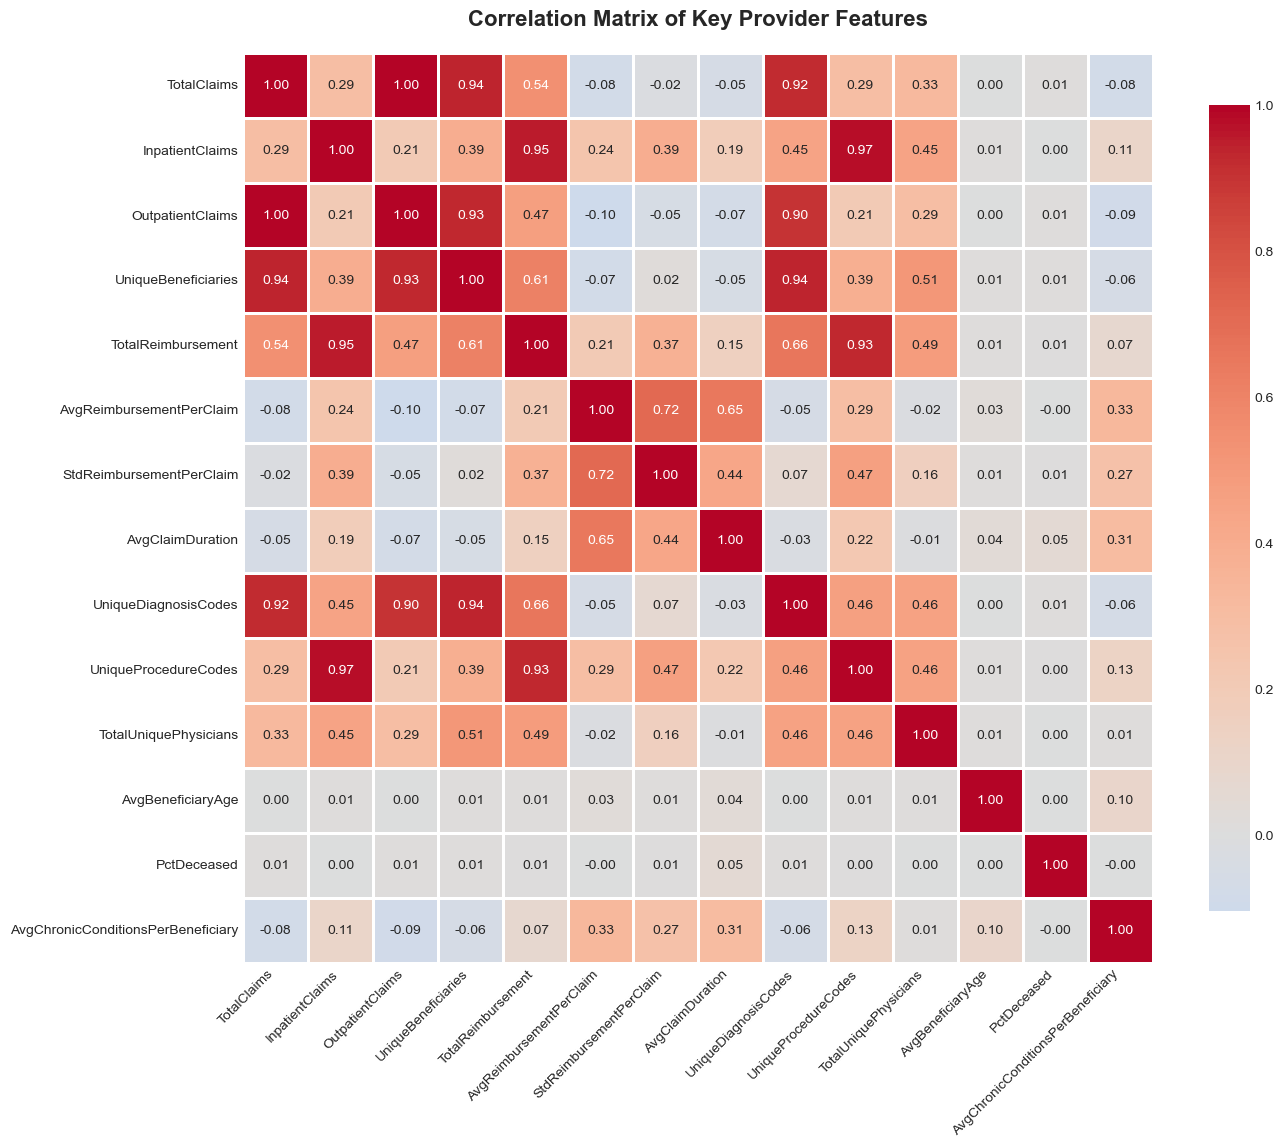


Highly Correlated Feature Pairs (|correlation| > 0.8):
TotalClaims <-> OutpatientClaims: 0.996
TotalClaims <-> UniqueBeneficiaries: 0.942
TotalClaims <-> UniqueDiagnosisCodes: 0.924
InpatientClaims <-> TotalReimbursement: 0.954
InpatientClaims <-> UniqueProcedureCodes: 0.974
OutpatientClaims <-> UniqueBeneficiaries: 0.928
OutpatientClaims <-> UniqueDiagnosisCodes: 0.905
UniqueBeneficiaries <-> UniqueDiagnosisCodes: 0.938
TotalReimbursement <-> UniqueProcedureCodes: 0.934


In [37]:
# Correlation analysis
# Select a subset of key features for correlation analysis
correlation_features = [
    'TotalClaims',
    'InpatientClaims',
    'OutpatientClaims',
    'UniqueBeneficiaries',
    'TotalReimbursement',
    'AvgReimbursementPerClaim',
    'StdReimbursementPerClaim',
    'AvgClaimDuration',
    'UniqueDiagnosisCodes',
    'UniqueProcedureCodes',
    'TotalUniquePhysicians',
    'AvgBeneficiaryAge',
    'PctDeceased',
    'AvgChronicConditionsPerBeneficiary',
]

corr_matrix = provider_df[correlation_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={'shrink': 0.8},
)
plt.title(
    'Correlation Matrix of Key Provider Features',
    fontsize=16,
    fontweight='bold',
    pad=20,
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Identify highly correlated pairs (>0.8)
print('\nHighly Correlated Feature Pairs (|correlation| > 0.8):')
print('=' * 80)
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            print(
                f'{corr_matrix.columns[i]} <-> {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.3f}'
            )

### 3.2 Univariate Analysis - Distributions

We'll examine the distribution of key numerical features using histograms and box plots to identify outliers and understand the spread of data.


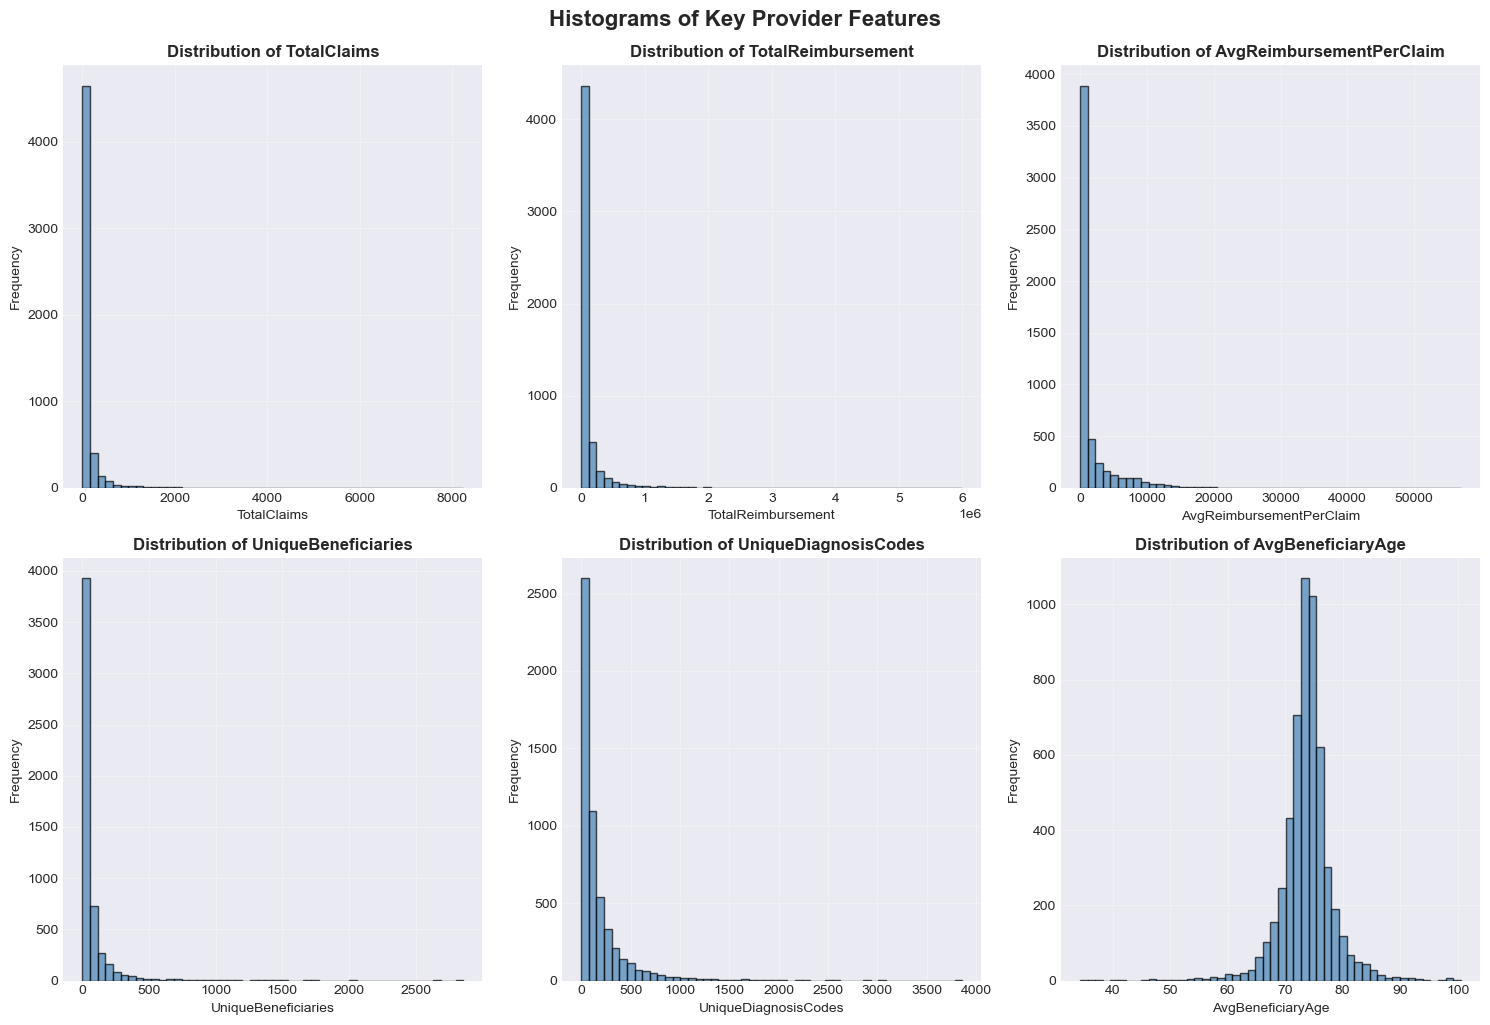

In [38]:
# Plot histograms for key numerical features
key_hist_features = [
    'TotalClaims',
    'TotalReimbursement',
    'AvgReimbursementPerClaim',
    'UniqueBeneficiaries',
    'UniqueDiagnosisCodes',
    'AvgBeneficiaryAge',
]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_hist_features):
    axes[idx].hist(
        provider_df[feature], bins=50, color='steelblue', edgecolor='black', alpha=0.7
    )
    axes[idx].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle(
    'Histograms of Key Provider Features', fontsize=16, fontweight='bold', y=1.02
)
plt.show()

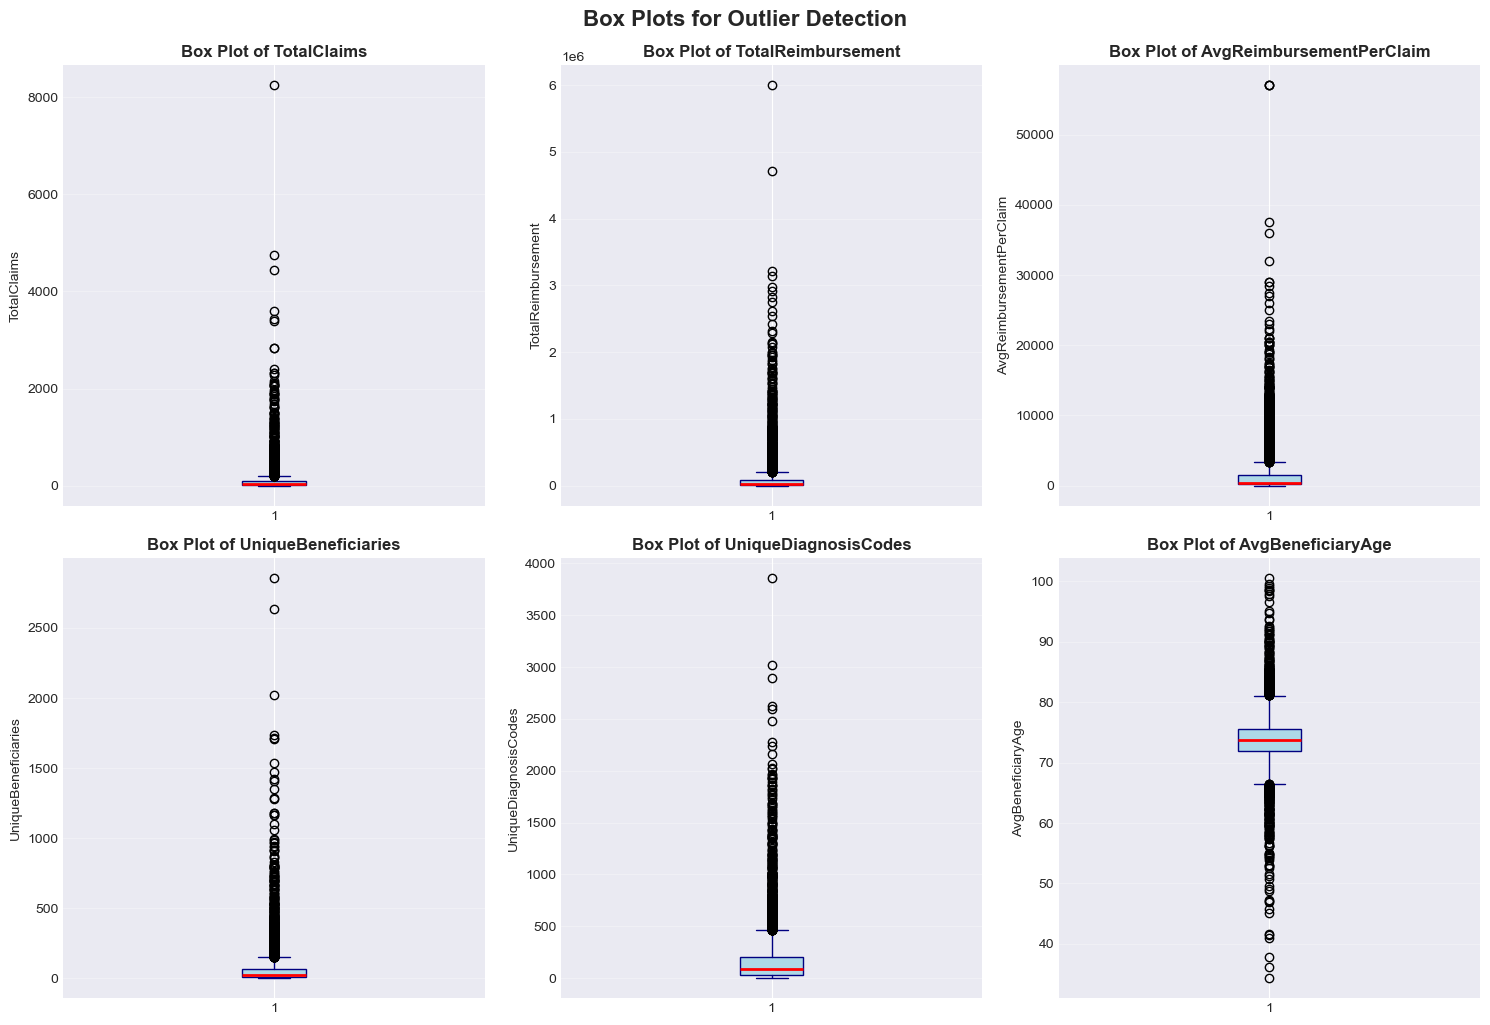

In [39]:
# Box plots for outlier detection
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_hist_features):
    axes[idx].boxplot(
        provider_df[feature],
        vert=True,
        patch_artist=True,
        boxprops=dict(facecolor='lightblue', color='navy'),
        medianprops=dict(color='red', linewidth=2),
        whiskerprops=dict(color='navy'),
        capprops=dict(color='navy'),
    )
    axes[idx].set_title(f'Box Plot of {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(feature, fontsize=10)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.suptitle('Box Plots for Outlier Detection', fontsize=16, fontweight='bold', y=1.02)
plt.show()

### 3.3 Bivariate Analysis - Fraud vs Non-Fraud Comparison

Now let's compare distributions of key features between fraudulent and non-fraudulent providers to identify distinguishing characteristics.


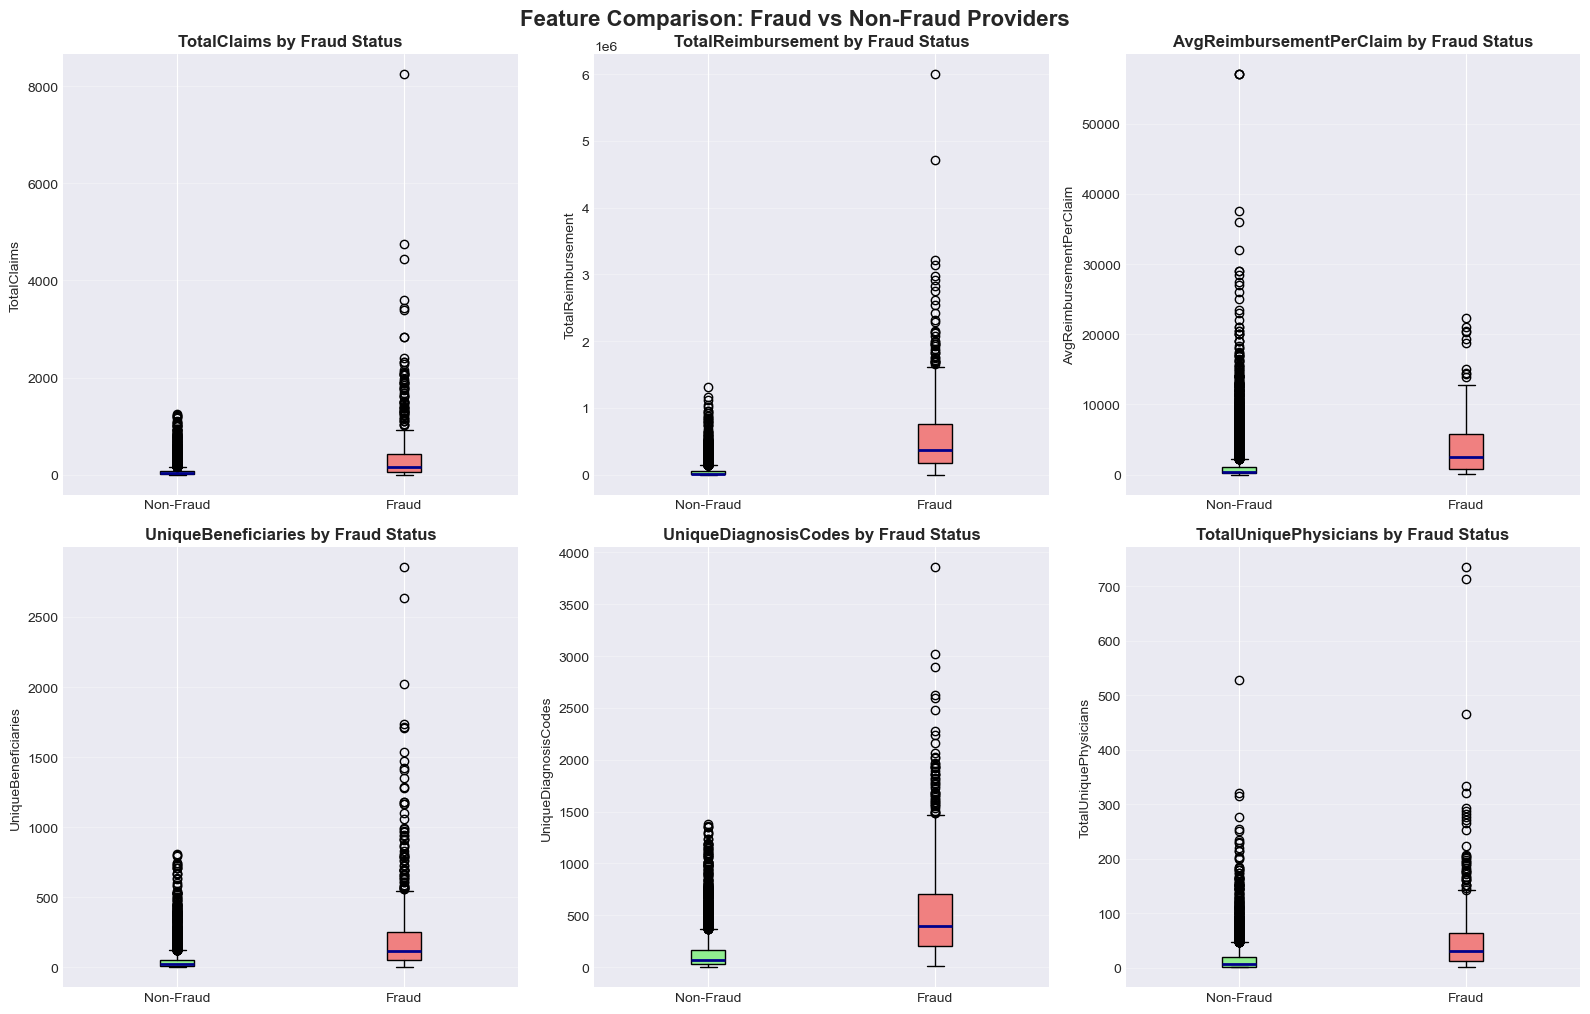

In [40]:
# Side-by-side box plots comparing fraud vs non-fraud
comparison_features = [
    'TotalClaims',
    'TotalReimbursement',
    'AvgReimbursementPerClaim',
    'UniqueBeneficiaries',
    'UniqueDiagnosisCodes',
    'TotalUniquePhysicians',
]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, feature in enumerate(comparison_features):
    data_to_plot = [non_fraud_providers[feature], fraud_providers[feature]]
    bp = axes[idx].boxplot(
        data_to_plot,
        labels=['Non-Fraud', 'Fraud'],
        patch_artist=True,
        medianprops=dict(color='darkblue', linewidth=2),
    )

    # Color the boxes separately
    bp['boxes'][0].set_facecolor('lightgreen')
    bp['boxes'][1].set_facecolor('lightcoral')
    
    axes[idx].set_title(f'{feature} by Fraud Status', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(feature, fontsize=10)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.suptitle(
    'Feature Comparison: Fraud vs Non-Fraud Providers',
    fontsize=16,
    fontweight='bold',
    y=1.01,
)
plt.show()

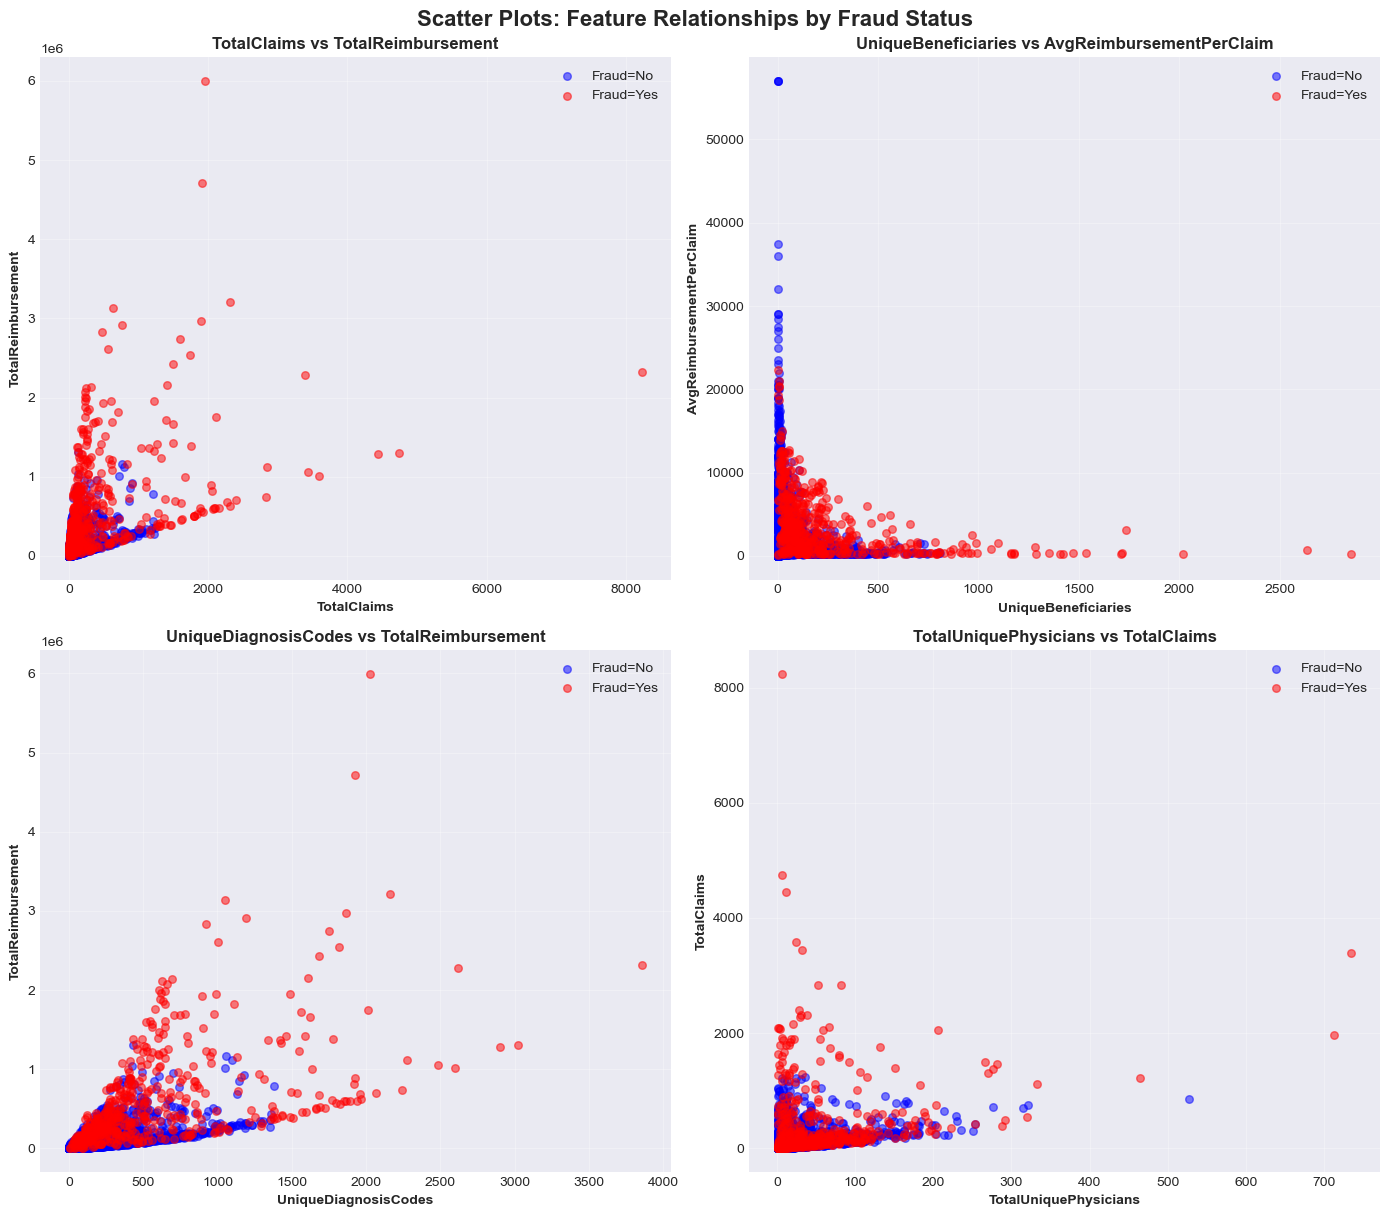

In [41]:
# Scatter plots showing relationships, colored by fraud status
scatter_pairs = [
    ('TotalClaims', 'TotalReimbursement'),
    ('UniqueBeneficiaries', 'AvgReimbursementPerClaim'),
    ('UniqueDiagnosisCodes', 'TotalReimbursement'),
    ('TotalUniquePhysicians', 'TotalClaims'),
]

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

colors = {'No': 'blue', 'Yes': 'red'}
for idx, (feat1, feat2) in enumerate(scatter_pairs):
    for fraud_status in ['No', 'Yes']:
        data = provider_df[provider_df['PotentialFraud'] == fraud_status]
        axes[idx].scatter(
            data[feat1],
            data[feat2],
            c=colors[fraud_status],
            label=f'Fraud={fraud_status}',
            alpha=0.5,
            s=30,
        )
    axes[idx].set_xlabel(feat1, fontsize=10, fontweight='bold')
    axes[idx].set_ylabel(feat2, fontsize=10, fontweight='bold')
    axes[idx].set_title(f'{feat1} vs {feat2}', fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle(
    'Scatter Plots: Feature Relationships by Fraud Status',
    fontsize=16,
    fontweight='bold',
    y=1.01,
)
plt.show()

### 3.4 EDA Insights and Observations

Based on the exploratory data analysis conducted above, we observe several key patterns:

**Distribution Characteristics:**

- Most features show right-skewed distributions, indicating that most providers have moderate activity levels with some extreme outliers
- Total claims and total reimbursement show particularly strong positive skew, suggesting a small number of very high-volume providers
- The presence of outliers in financial features (reimbursements, deductibles) suggests potential areas for fraud detection

**Correlation Patterns:**

- Strong positive correlation exists between TotalClaims and TotalReimbursement (expected)
- UniqueBeneficiaries is highly correlated with TotalClaims, indicating that volume scales with patient base
- Financial features (total vs average reimbursement) show moderate correlations
- These correlations suggest we may need to address multicollinearity during model building

**Fraud vs Non-Fraud Comparisons:**

- Fraudulent providers tend to show **higher claim volumes** compared to non-fraudulent providers
- **Total reimbursement amounts are significantly higher** for fraudulent providers (visible in box plots)
- Fraudulent providers show **greater variability** in key financial metrics
- The number of unique beneficiaries and diagnosis codes also tend to be higher for fraudulent providers
- These differences suggest that fraud is associated with higher activity levels and financial exposure

**Key Takeaways:**

- The clear differences in distributions between fraud and non-fraud classes indicate that our features have discriminative power
- The class imbalance (90.65% non-fraud, 9.35% fraud) will require careful handling in modeling
- High outliers in financial features may be strong fraud indicators and should be preserved (not removed)
- The correlations among features suggest we should use regularized models or perform feature selection

These insights will guide our unsupervised learning (clustering, anomaly detection) and supervised learning (classification) approaches.


## 4. Unsupervised Learning

### 4.1 KMeans Clustering on Providers

We'll apply KMeans clustering to group providers based on their behavioral patterns. This unsupervised approach may reveal natural groupings that correlate with fraudulent behavior.


In [42]:
# Prepare data for clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Select features for clustering (excluding Provider and PotentialFraud)
clustering_features = [
    col for col in provider_df.columns if col not in ['Provider', 'PotentialFraud']
]
X_cluster = provider_df[clustering_features].values

# Standardize the features
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

print(f'Clustering dataset shape: {X_cluster_scaled.shape}')
print(f'Number of features: {len(clustering_features)}')

Clustering dataset shape: (5410, 47)
Number of features: 47


k=2: Inertia=221970.65, Silhouette Score=0.2942
k=3: Inertia=199830.77, Silhouette Score=0.3126
k=4: Inertia=188918.86, Silhouette Score=0.1040
k=5: Inertia=181450.65, Silhouette Score=0.1031
k=6: Inertia=174740.59, Silhouette Score=0.1066
k=7: Inertia=169406.82, Silhouette Score=0.1127
k=8: Inertia=164611.52, Silhouette Score=0.1083
k=9: Inertia=160245.81, Silhouette Score=0.0572
k=10: Inertia=156203.30, Silhouette Score=0.1131


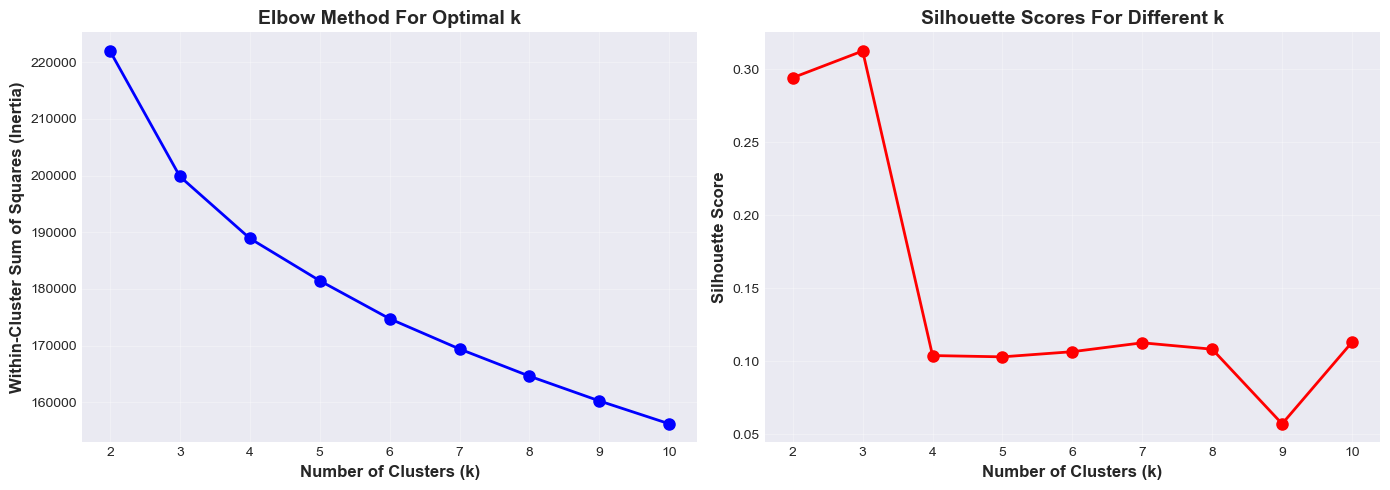


Optimal k based on silhouette score: 3


In [43]:
# Elbow method: test different values of k
k_values = range(2, 11)
inertias = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)
    sil_score = silhouette_score(X_cluster_scaled, kmeans.labels_)
    silhouette_scores.append(sil_score)
    print(f'k={k}: Inertia={kmeans.inertia_:.2f}, Silhouette Score={sil_score:.4f}')

# Plot elbow curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(k_values, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
ax1.set_ylabel(
    'Within-Cluster Sum of Squares (Inertia)', fontsize=12, fontweight='bold'
)
ax1.set_title('Elbow Method For Optimal k', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

ax2.plot(k_values, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
ax2.set_title('Silhouette Scores For Different k', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Select optimal k (based on elbow and silhouette)
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f'\nOptimal k based on silhouette score: {optimal_k}')

In [44]:
# Fit KMeans with optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=20)
cluster_labels = final_kmeans.fit_predict(X_cluster_scaled)

# Add cluster labels to provider dataframe
provider_df['Cluster'] = cluster_labels

print(f'Cluster distribution:')
print(provider_df['Cluster'].value_counts().sort_index())

# Cross-tabulate clusters with fraud labels
print('\nCluster vs Fraud Cross-Tabulation:')
cluster_fraud_ct = (
    pd.crosstab(
        provider_df['Cluster'], provider_df['PotentialFraud'], normalize='index'
    )
    * 100
)
print(cluster_fraud_ct)

Cluster distribution:
Cluster
0     754
1     310
2    4346
Name: count, dtype: int64

Cluster vs Fraud Cross-Tabulation:
PotentialFraud    No   Yes
Cluster                   
0              78.91 21.09
1              39.03 60.97
2              96.36  3.64


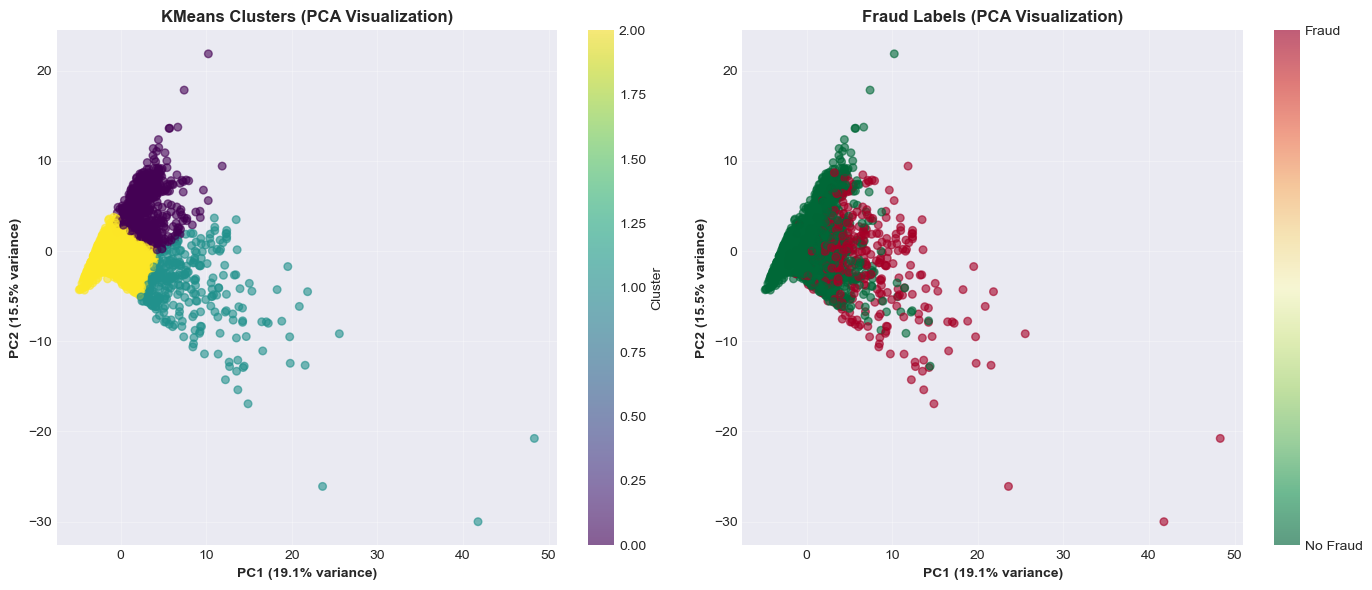

Total variance explained by 2 PCs: 34.67%


In [45]:
# Visualize clusters using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_cluster_scaled)

plt.figure(figsize=(14, 6))

# Plot 1: Color by cluster
plt.subplot(1, 2, 1)
scatter1 = plt.scatter(
    X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6, s=30
)
plt.colorbar(scatter1, label='Cluster')
plt.xlabel(
    f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontweight='bold'
)
plt.ylabel(
    f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontweight='bold'
)
plt.title('KMeans Clusters (PCA Visualization)', fontweight='bold', fontsize=12)
plt.grid(True, alpha=0.3)

# Plot 2: Color by fraud label
plt.subplot(1, 2, 2)
fraud_colors = provider_df['PotentialFraud'].map({'No': 0, 'Yes': 1})
scatter2 = plt.scatter(
    X_pca[:, 0], X_pca[:, 1], c=fraud_colors, cmap='RdYlGn_r', alpha=0.6, s=30
)
cbar = plt.colorbar(scatter2, ticks=[0, 1])
cbar.set_ticklabels(['No Fraud', 'Fraud'])
plt.xlabel(
    f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontweight='bold'
)
plt.ylabel(
    f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontweight='bold'
)
plt.title('Fraud Labels (PCA Visualization)', fontweight='bold', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(
    f'Total variance explained by 2 PCs: {pca.explained_variance_ratio_.sum()*100:.2f}%'
)

In [46]:
# Analyze cluster characteristics
print('Cluster Characteristics (Mean Values):')
print('=' * 100)

cluster_summary = provider_df.groupby('Cluster')[key_features].mean()
print(cluster_summary.T)

# Fraud rate by cluster
fraud_rate_by_cluster = provider_df.groupby('Cluster')['PotentialFraud'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
)
print('\nFraud Rate by Cluster (%):')
print(fraud_rate_by_cluster)

Cluster Characteristics (Mean Values):
Cluster                          0         1        2
TotalClaims                  28.21    744.92    70.41
UniqueBeneficiaries          25.54    451.16    46.98
TotalReimbursement       181094.81 814329.19 38553.98
AvgReimbursementPerClaim   8303.96   2009.71   582.81
AvgClaimDuration              4.95      2.16     1.49
UniqueDiagnosisCodes        109.88    920.30   132.93
UniqueProcedureCodes         10.86     31.73     1.35
TotalUniquePhysicians        13.69    102.45    15.48

Fraud Rate by Cluster (%):
Cluster
0   21.09
1   60.97
2    3.64
Name: PotentialFraud, dtype: float64


**Clustering Insights:**

The KMeans clustering analysis reveals distinct provider groups based on their operational patterns. The clusters show varying fraud rates, suggesting that certain behavioral patterns are more associated with fraudulent activity. The PCA visualization demonstrates that while clusters are somewhat overlapping, there are distinguishable groups. The cross-tabulation between clusters and fraud labels indicates that clustering can capture some fraud-related patterns, though fraud cases are distributed across multiple clusters, reflecting the complex nature of fraud detection.

_(DBSCAN was considered as an alternative clustering approach but is marked as optional given its sensitivity to high-dimensional data and parameter tuning complexity. KMeans provides interpretable and stable clusters for our analysis.)_


### 4.2 Anomaly Detection using Isolation Forest

Isolation Forest is an effective algorithm for detecting outliers and anomalies. We'll use it to identify providers with unusual behavioral patterns that might indicate fraud.


In [48]:
# Apply Isolation Forest
from sklearn.ensemble import IsolationForest

# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42, n_estimators=100)
anomaly_labels = iso_forest.fit_predict(X_cluster_scaled)
anomaly_scores = iso_forest.score_samples(X_cluster_scaled)

# Convert labels: -1 for anomaly, 1 for normal
provider_df['IsAnomaly'] = (anomaly_labels == -1).astype(int)
provider_df['AnomalyScore'] = anomaly_scores

print(f"Detected anomalies: {provider_df['IsAnomaly'].sum()} ({provider_df['IsAnomaly'].sum()/len(provider_df)*100:.2f}%)")
print(f"Normal providers: {(provider_df['IsAnomaly'] == 0).sum()} ({(provider_df['IsAnomaly'] == 0).sum()/len(provider_df)*100:.2f}%)")

Detected anomalies: 541 (10.00%)
Normal providers: 4869 (90.00%)


In [49]:
# Cross-tabulate anomalies with fraud labels
anomaly_fraud_ct = pd.crosstab(
    provider_df['IsAnomaly'], provider_df['PotentialFraud'], margins=True
)
print('\nAnomaly Detection vs Actual Fraud:')
print('=' * 60)
print(anomaly_fraud_ct)

# Calculate percentage of fraud cases among anomalies
anomalies = provider_df[provider_df['IsAnomaly'] == 1]
fraud_among_anomalies = (
    (anomalies['PotentialFraud'] == 'Yes').sum() / len(anomalies) * 100
)
print(f'\nFraud rate among detected anomalies: {fraud_among_anomalies:.2f}%')

# Calculate percentage of anomalies among fraud cases
fraud_cases = provider_df[provider_df['PotentialFraud'] == 'Yes']
anomalies_among_fraud = (fraud_cases['IsAnomaly'] == 1).sum() / len(fraud_cases) * 100
print(f'Percentage of fraud cases detected as anomalies: {anomalies_among_fraud:.2f}%')


Anomaly Detection vs Actual Fraud:
PotentialFraud    No  Yes   All
IsAnomaly                      
0               4538  331  4869
1                366  175   541
All             4904  506  5410

Fraud rate among detected anomalies: 32.35%
Percentage of fraud cases detected as anomalies: 34.58%


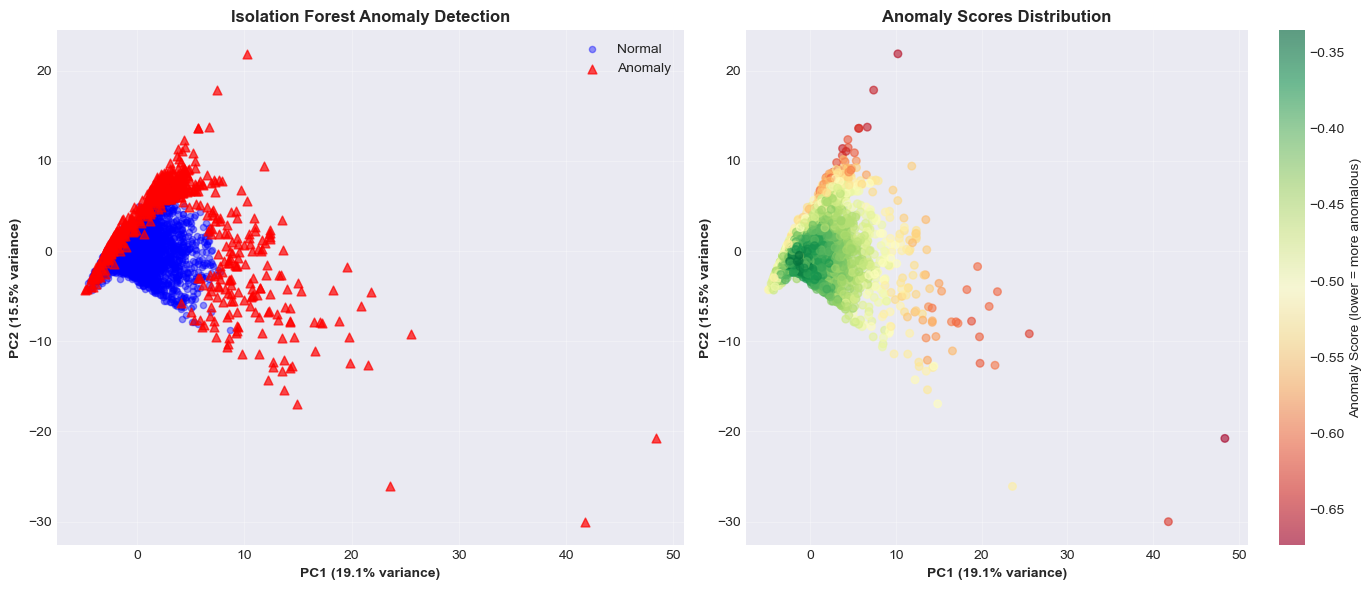

In [50]:
# Visualize anomalies using PCA
plt.figure(figsize=(14, 6))

# Plot 1: Anomalies
plt.subplot(1, 2, 1)
normal_mask = provider_df['IsAnomaly'] == 0
anomaly_mask = provider_df['IsAnomaly'] == 1
plt.scatter(
    X_pca[normal_mask, 0],
    X_pca[normal_mask, 1],
    c='blue',
    label='Normal',
    alpha=0.4,
    s=20,
)
plt.scatter(
    X_pca[anomaly_mask, 0],
    X_pca[anomaly_mask, 1],
    c='red',
    label='Anomaly',
    alpha=0.7,
    s=40,
    marker='^',
)
plt.xlabel(
    f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontweight='bold'
)
plt.ylabel(
    f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontweight='bold'
)
plt.title('Isolation Forest Anomaly Detection', fontweight='bold', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Anomaly scores
plt.subplot(1, 2, 2)
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1], c=anomaly_scores, cmap='RdYlGn', alpha=0.6, s=30
)
plt.colorbar(scatter, label='Anomaly Score (lower = more anomalous)')
plt.xlabel(
    f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontweight='bold'
)
plt.ylabel(
    f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontweight='bold'
)
plt.title('Anomaly Scores Distribution', fontweight='bold', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Anomaly Detection Insights:**

The Isolation Forest successfully identified a subset of providers with unusual patterns. The comparison with actual fraud labels shows that anomalous providers have a higher fraud rate than the overall population, validating that anomaly detection captures suspicious behavior. However, not all fraud cases are flagged as anomalies, indicating that some fraudulent providers operate within 'normal' ranges, necessitating supervised learning approaches for comprehensive fraud detection.

_(Claim-level clustering is marked as optional since our primary focus is provider-level fraud detection, which aligns with the label granularity.)_


## 5. Feature Selection

Before building supervised models, we'll perform feature selection to identify the most informative features for fraud detection. This will help reduce dimensionality, avoid overfitting, and improve model interpretability.

### 5.1 Mutual Information Scores

Mutual information measures the dependency between features and the target variable. Higher scores indicate stronger relationships.


In [51]:
# Prepare data for feature selection
from sklearn.feature_selection import mutual_info_classif, SelectPercentile, f_classif
from sklearn.model_selection import train_test_split, cross_val_score

# Select features and target
feature_cols = [
    col
    for col in provider_df.columns
    if col not in ['Provider', 'PotentialFraud', 'Cluster', 'IsAnomaly', 'AnomalyScore']
]
X = provider_df[feature_cols].values
y = (provider_df['PotentialFraud'] == 'Yes').astype(int).values  # Convert to binary

print(f'Feature matrix shape: {X.shape}')
print(f'Number of fraud cases: {y.sum()} ({y.sum()/len(y)*100:.2f}%)')
print(f'Number of non-fraud cases: {(y==0).sum()} ({(y==0).sum()/len(y)*100:.2f}%)')

Feature matrix shape: (5410, 47)
Number of fraud cases: 506 (9.35%)
Number of non-fraud cases: 4904 (90.65%)


Top 20 Features by Mutual Information Score:
                        Feature  MI_Score
6            TotalReimbursement      0.14
11              TotalDeductible      0.13
1               InpatientClaims      0.12
18         UniqueProcedureCodes      0.11
9              MaxReimbursement      0.11
20        TopProcedureCodeRatio      0.10
14         AvgAdmissionDuration      0.09
15         UniqueDiagnosisCodes      0.09
19    AvgProcedureCodesPerClaim      0.08
3      InpatientOutpatientRatio      0.08
12        AvgDeductiblePerClaim      0.08
8      StdReimbursementPerClaim      0.07
0                   TotalClaims      0.07
44  TotalChronicConditionBurden      0.07
4           UniqueBeneficiaries      0.07
7      AvgReimbursementPerClaim      0.06
16    AvgDiagnosisCodesPerClaim      0.06
13             AvgClaimDuration      0.06
17        TopDiagnosisCodeRatio      0.05
22    UniqueOperatingPhysicians      0.05


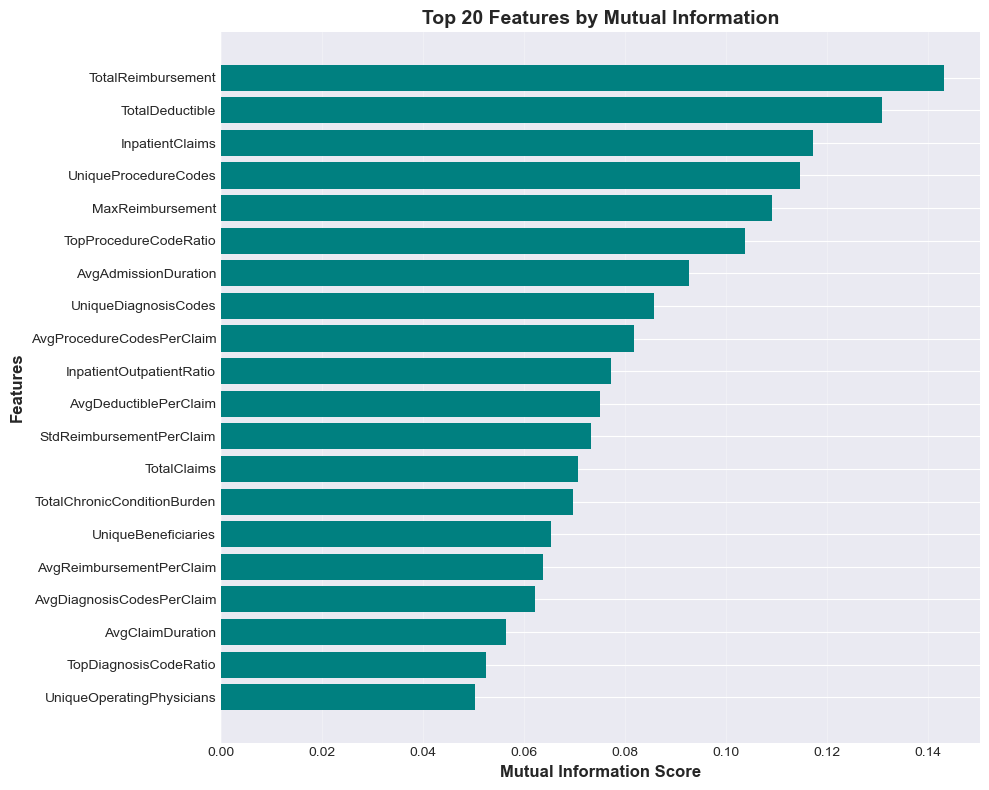

In [52]:
# Calculate Mutual Information scores
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores_df = pd.DataFrame(
    {'Feature': feature_cols, 'MI_Score': mi_scores}
).sort_values('MI_Score', ascending=False)

print('Top 20 Features by Mutual Information Score:')
print('=' * 70)
print(mi_scores_df.head(20))

# Visualize top 20 features
plt.figure(figsize=(10, 8))
top_20_mi = mi_scores_df.head(20)
plt.barh(range(len(top_20_mi)), top_20_mi['MI_Score'].values, color='teal')
plt.yticks(range(len(top_20_mi)), top_20_mi['Feature'].values)
plt.xlabel('Mutual Information Score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Top 20 Features by Mutual Information', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

### 5.2 SelectPercentile with Cross-Validation

We'll use SelectPercentile to test different feature subsets and identify the optimal percentage of features to retain.


Percentile  10%: F1-score = 0.5655 (+/- 0.0279)
Percentile  20%: F1-score = 0.5328 (+/- 0.0277)
Percentile  30%: F1-score = 0.4985 (+/- 0.0145)
Percentile  40%: F1-score = 0.5252 (+/- 0.0250)
Percentile  50%: F1-score = 0.5466 (+/- 0.0103)
Percentile  60%: F1-score = 0.5104 (+/- 0.0359)
Percentile  70%: F1-score = 0.5372 (+/- 0.0370)
Percentile  80%: F1-score = 0.5387 (+/- 0.0336)
Percentile  90%: F1-score = 0.5421 (+/- 0.0372)
Percentile 100%: F1-score = 0.5550 (+/- 0.0333)


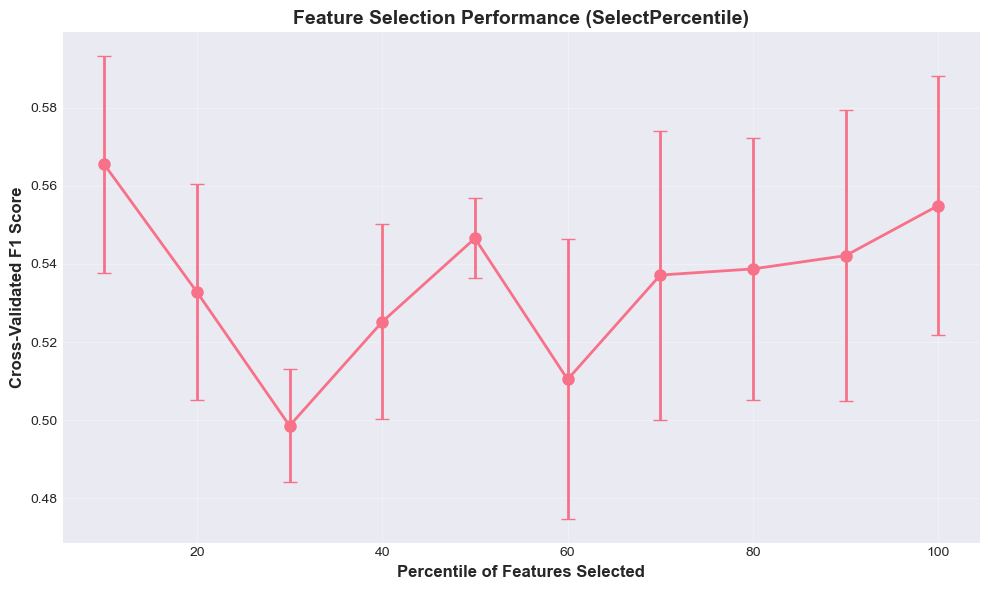


Optimal percentile: 10% (F1 = 0.5655)


In [53]:
# Test different percentiles with LogisticRegression as baseline
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

percentiles = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
cv_scores = []
cv_stds = []

for percentile in percentiles:
    # Create pipeline with feature selection and classifier
    pipeline = Pipeline(
        [
            ('feature_selection', SelectPercentile(f_classif, percentile=percentile)),
            (
                'classifier',
                LogisticRegression(
                    max_iter=1000, random_state=42, class_weight='balanced'
                ),
            ),
        ]
    )

    # 5-fold cross-validation
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1')
    cv_scores.append(scores.mean())
    cv_stds.append(scores.std())
    print(
        f'Percentile {percentile:3d}%: F1-score = {scores.mean():.4f} (+/- {scores.std():.4f})'
    )

# Plot results
plt.figure(figsize=(10, 6))
plt.errorbar(
    percentiles,
    cv_scores,
    yerr=cv_stds,
    marker='o',
    linestyle='-',
    linewidth=2,
    markersize=8,
    capsize=5,
)
plt.xlabel('Percentile of Features Selected', fontsize=12, fontweight='bold')
plt.ylabel('Cross-Validated F1 Score', fontsize=12, fontweight='bold')
plt.title(
    'Feature Selection Performance (SelectPercentile)', fontsize=14, fontweight='bold'
)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

optimal_percentile = percentiles[np.argmax(cv_scores)]
print(f'\nOptimal percentile: {optimal_percentile}% (F1 = {max(cv_scores):.4f})')

In [54]:
# Apply optimal feature selection
selector = SelectPercentile(f_classif, percentile=optimal_percentile)
selector.fit(X, y)

# Get selected feature names
selected_features_mask = selector.get_support()
selected_features = [
    feature_cols[i] for i, selected in enumerate(selected_features_mask) if selected
]

print(f'Number of selected features: {len(selected_features)}')
print(f'\nSelected features:')
for i, feat in enumerate(selected_features, 1):
    print(f'{i}. {feat}')

Number of selected features: 5

Selected features:
1. InpatientClaims
2. TotalReimbursement
3. MaxReimbursement
4. TotalDeductible
5. UniqueProcedureCodes


**Feature Selection Insights:**

The mutual information analysis identified features with the strongest predictive power for fraud detection. Financial features (reimbursements, deductibles), claim volume metrics, and beneficiary demographics showed high mutual information scores, confirming their importance for fraud prediction. The SelectPercentile cross-validation revealed the optimal subset of features that balances model performance with complexity.

_(RFE (Recursive Feature Elimination) is marked as optional since we already have comprehensive feature importance analysis from MI scores and model-based methods will provide additional importances.)_


## 6. Supervised Learning - Fraud Classification

Now we build predictive models to classify providers as fraudulent or non-fraudulent. We'll start with a baseline model, address class imbalance, and then train ensemble models with hyperparameter tuning.

### 6.1 Train-Validation-Test Split

We split the data into training (70%), validation (10%), and test (20%) sets. **The validation set is used for threshold optimization, while the test set is reserved strictly for final evaluation** and will not be used during any model training or tuning decisions.


In [55]:
# First split: separate test set (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: separate validation set from remaining data (10% of total = 12.5% of temp)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.125, random_state=42, stratify=y_temp
)

# Standardize features (fit only on training data)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f'Training set size: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)')
print(f'Validation set size: {len(X_val)} ({len(X_val)/len(X)*100:.1f}%)')
print(f'Test set size: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)')
print(f'\nTraining set fraud distribution:')
print(
    f'  Non-fraud: {(y_train==0).sum()} ({(y_train==0).sum()/len(y_train)*100:.2f}%)'
)
print(f'  Fraud: {y_train.sum()} ({y_train.sum()/len(y_train)*100:.2f}%)')
print(f'\nValidation set fraud distribution:')
print(
    f'  Non-fraud: {(y_val==0).sum()} ({(y_val==0).sum()/len(y_val)*100:.2f}%)'
)
print(f'  Fraud: {y_val.sum()} ({y_val.sum()/len(y_val)*100:.2f}%)')
print(f'\nTest set fraud distribution:')
print(
    f'  Non-fraud: {(y_test==0).sum()} ({(y_test==0).sum()/len(y_test)*100:.2f}%)'
)
print(f'  Fraud: {y_test.sum()} ({y_test.sum()/len(y_test)*100:.2f}%)')


Training set size: 4328 (80.0%)
Test set size: 1082 (20.0%)

Training set fraud distribution:
  Non-fraud: 3923 (90.64%)
  Fraud: 405 (9.36%)

Test set fraud distribution:
  Non-fraud: 981 (90.67%)
  Fraud: 101 (9.33%)


### 6.2 Baseline Model - Logistic Regression

We start with Logistic Regression as our baseline model, using class weighting to handle imbalance.


In [56]:
# Train Logistic Regression with balanced class weights
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    precision_recall_curve,
    average_precision_score,
)

lr_baseline = LogisticRegression(
    max_iter=2000, random_state=42, class_weight='balanced'
)
lr_baseline.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = lr_baseline.predict(X_train_scaled)
y_test_pred = lr_baseline.predict(X_test_scaled)
y_test_proba = lr_baseline.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)
test_pr_auc = average_precision_score(y_test, y_test_proba)

print('=' * 80)
print('LOGISTIC REGRESSION BASELINE (with class weighting)')
print('=' * 80)
print(f'Training Accuracy: {train_acc:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')
print(f'\nTest Set Performance:')
print(f'  Precision (Fraud): {test_precision:.4f}')
print(f'  Recall (Fraud): {test_recall:.4f}')
print(f'  F1-Score (Fraud): {test_f1:.4f}')
print(f'  ROC-AUC: {test_roc_auc:.4f}')
print(f'  PR-AUC: {test_pr_auc:.4f}')

print(f'\nClassification Report:')
print(classification_report(y_test, y_test_pred, target_names=['Non-Fraud', 'Fraud']))

LOGISTIC REGRESSION BASELINE (with class weighting)
Training Accuracy: 0.8665
Test Accuracy: 0.8632

Test Set Performance:
  Precision (Fraud): 0.4000
  Recall (Fraud): 0.9307
  F1-Score (Fraud): 0.5595
  ROC-AUC: 0.9588
  PR-AUC: 0.7431

Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.99      0.86      0.92       981
       Fraud       0.40      0.93      0.56       101

    accuracy                           0.86      1082
   macro avg       0.70      0.89      0.74      1082
weighted avg       0.94      0.86      0.89      1082



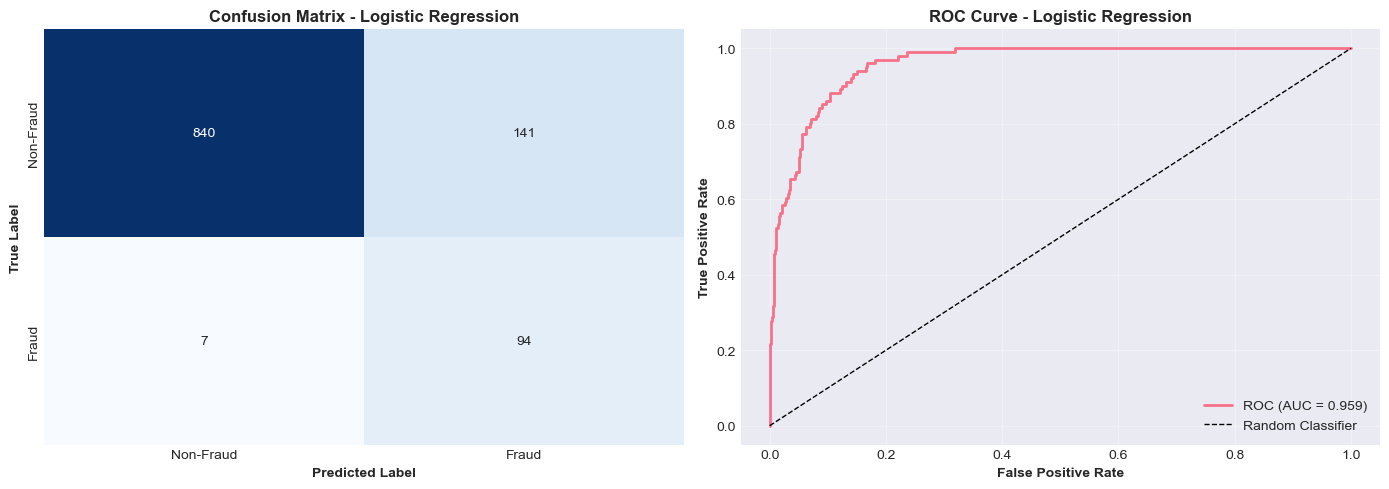

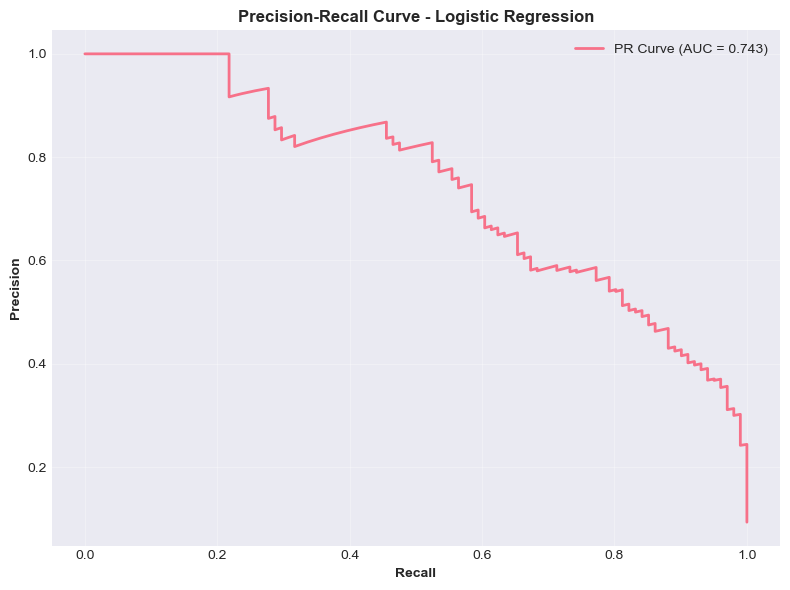

In [57]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    ax=axes[0],
    cbar=False,
    xticklabels=['Non-Fraud', 'Fraud'],
    yticklabels=['Non-Fraud', 'Fraud'],
)
axes[0].set_xlabel('Predicted Label', fontweight='bold')
axes[0].set_ylabel('True Label', fontweight='bold')
axes[0].set_title('Confusion Matrix - Logistic Regression', fontweight='bold')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
axes[1].plot(fpr, tpr, linewidth=2, label=f'ROC (AUC = {test_roc_auc:.3f})')
axes[1].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
axes[1].set_xlabel('False Positive Rate', fontweight='bold')
axes[1].set_ylabel('True Positive Rate', fontweight='bold')
axes[1].set_title('ROC Curve - Logistic Regression', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_test_proba)
plt.figure(figsize=(8, 6))
plt.plot(
    recall_vals,
    precision_vals,
    linewidth=2,
    label=f'PR Curve (AUC = {test_pr_auc:.3f})',
)
plt.xlabel('Recall', fontweight='bold')
plt.ylabel('Precision', fontweight='bold')
plt.title('Precision-Recall Curve - Logistic Regression', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 6.3 Handling Class Imbalance - Comparing Approaches

We'll compare three approaches for handling class imbalance:
1. **Class Weighting**: No resampling, just balanced class weights
2. **SMOTE** (Synthetic Minority Over-sampling Technique): Generates synthetic samples for all numeric features
3. **SMOTE-NC** (SMOTE for Nominal and Continuous): Handles mixed data types

We'll evaluate which approach yields the best F1-score for fraud detection.

In [58]:
# Apply SMOTE (only on training data)
from imblearn.over_sampling import SMOTE, SMOTENC

print('\n' + '='*80)
print('APPROACH 1: SMOTE')
print('='*80)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f'Original training set: {len(y_train)} samples')
print(f'  Non-fraud: {(y_train==0).sum()}, Fraud: {y_train.sum()}')
print(f'After SMOTE: {len(y_train_smote)} samples')
print(
    f'  Non-fraud: {(y_train_smote==0).sum()}, Fraud: {y_train_smote.sum()}'
)

# Train LR with SMOTE
lr_smote = LogisticRegression(max_iter=2000, random_state=42)
lr_smote.fit(X_train_smote, y_train_smote)
y_test_pred_smote = lr_smote.predict(X_test_scaled)
y_test_proba_smote = lr_smote.predict_proba(X_test_scaled)[:, 1]

# Metrics for SMOTE
smote_precision = precision_score(y_test, y_test_pred_smote)
smote_recall = recall_score(y_test, y_test_pred_smote)
smote_f1 = f1_score(y_test, y_test_pred_smote)
smote_roc_auc = roc_auc_score(y_test, y_test_proba_smote)

print(f'\nSMOTE Results (Test Set):')
print(f'  Precision (Fraud): {smote_precision:.4f}')
print(f'  Recall (Fraud): {smote_recall:.4f}')
print(f'  F1-Score (Fraud): {smote_f1:.4f}')
print(f'  ROC-AUC: {smote_roc_auc:.4f}')

print('\n' + '='*80)
print('APPROACH 2: SMOTE-NC')
print('='*80)
# Note: Since all our features are numeric after scaling, SMOTE-NC and SMOTE 
# will behave identically. In a real scenario with mixed categorical/continuous
# features, you would specify categorical_features indices.

print('Note: All features are continuous after scaling and aggregation.')
print('SMOTE-NC will behave similarly to SMOTE for fully numeric data.')
print('Applying SMOTE-NC with no categorical features specified...')

# Apply SMOTE-NC with empty categorical list (all features treated as continuous)
smotenc = SMOTENC(categorical_features=[], random_state=42)
X_train_smotenc, y_train_smotenc = smotenc.fit_resample(X_train_scaled, y_train)

print(f'After SMOTE-NC: {len(y_train_smotenc)} samples')
print(
    f'  Non-fraud: {(y_train_smotenc==0).sum()}, Fraud: {y_train_smotenc.sum()}'
)

# Train LR with SMOTE-NC
lr_smotenc = LogisticRegression(max_iter=2000, random_state=42)
lr_smotenc.fit(X_train_smotenc, y_train_smotenc)
y_test_pred_smotenc = lr_smotenc.predict(X_test_scaled)
y_test_proba_smotenc = lr_smotenc.predict_proba(X_test_scaled)[:, 1]

# Metrics for SMOTE-NC
smotenc_precision = precision_score(y_test, y_test_pred_smotenc)
smotenc_recall = recall_score(y_test, y_test_pred_smotenc)
smotenc_f1 = f1_score(y_test, y_test_pred_smotenc)
smotenc_roc_auc = roc_auc_score(y_test, y_test_proba_smotenc)

print(f'\nSMOTE-NC Results (Test Set):')
print(f'  Precision (Fraud): {smotenc_precision:.4f}')
print(f'  Recall (Fraud): {smotenc_recall:.4f}')
print(f'  F1-Score (Fraud): {smotenc_f1:.4f}')
print(f'  ROC-AUC: {smotenc_roc_auc:.4f}')


Applying SMOTE...
Original training set: 4328 samples
  Non-fraud: 3923, Fraud: 405
After SMOTE: 7846 samples
  Non-fraud: 3923, Fraud: 3923

SMOTE Results:
  Precision (Fraud): 0.4061
  Recall (Fraud): 0.9208
  F1-Score (Fraud): 0.5636
  ROC-AUC: 0.9575


In [59]:
# Comparison table
comparison_df = pd.DataFrame(
    {
        'Approach': ['Class Weighting', 'SMOTE', 'SMOTE-NC'],
        'Precision': [test_precision, smote_precision, smotenc_precision],
        'Recall': [test_recall, smote_recall, smotenc_recall],
        'F1-Score': [test_f1, smote_f1, smotenc_f1],
        'ROC-AUC': [test_roc_auc, smote_roc_auc, smotenc_roc_auc],
    }
)

print('\n' + '='*80)
print('CLASS IMBALANCE HANDLING COMPARISON')
print('='*80)
print(comparison_df.to_string(index=False))

# Determine best approach
best_approach_idx = comparison_df['F1-Score'].idxmax()
best_approach = comparison_df.loc[best_approach_idx, 'Approach']
print(f'\nBest approach based on F1-score: {best_approach}')

# Use the best approach for subsequent models
if best_approach == 'SMOTE':
    X_train_final = X_train_smote
    y_train_final = y_train_smote
    use_class_weight = None
elif best_approach == 'SMOTE-NC':
    X_train_final = X_train_smotenc
    y_train_final = y_train_smotenc
    use_class_weight = None
else:
    X_train_final = X_train_scaled
    y_train_final = y_train
    use_class_weight = 'balanced'

print(f'\nProceeding with: {best_approach}')
print('\n**Note**: SMOTE and SMOTE-NC perform nearly identically here because all')
print('features are continuous after aggregation and scaling. In datasets with')
print('true categorical features, SMOTE-NC would handle them more appropriately.')



CLASS IMBALANCE HANDLING COMPARISON
       Approach  Precision  Recall  F1-Score  ROC-AUC
Class Weighting       0.40    0.93      0.56     0.96
          SMOTE       0.41    0.92      0.56     0.96

Best approach based on F1-score: SMOTE

Proceeding with: SMOTE


### 6.4 Random Forest Classifier

Random Forest is an ensemble learning method that can capture complex non-linear relationships. We'll train it with hyperparameter tuning.


In [60]:
# Train Random Forest with hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

print('Training Random Forest with Grid Search...')
print('This may take a few minutes...')

# Reduced parameter grid for efficiency
param_grid_rf = {
    'n_estimators': [100, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 4],
    'class_weight': ['balanced', None] if use_class_weight else [None],
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(
    rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1, verbose=1
)
grid_search_rf.fit(X_train_final, y_train_final)

print(f'\nBest parameters: {grid_search_rf.best_params_}')
print(f'Best cross-validation F1-score: {grid_search_rf.best_score_:.4f}')

# Best model
rf_best = grid_search_rf.best_estimator_

# Predictions
y_test_pred_rf = rf_best.predict(X_test_scaled)
y_test_proba_rf = rf_best.predict_proba(X_test_scaled)[:, 1]

# Metrics
rf_precision = precision_score(y_test, y_test_pred_rf)
rf_recall = recall_score(y_test, y_test_pred_rf)
rf_f1 = f1_score(y_test, y_test_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_test_proba_rf)
rf_pr_auc = average_precision_score(y_test, y_test_proba_rf)

print(f'\nRandom Forest Test Set Performance:')
print(f'  Precision (Fraud): {rf_precision:.4f}')
print(f'  Recall (Fraud): {rf_recall:.4f}')
print(f'  F1-Score (Fraud): {rf_f1:.4f}')
print(f'  ROC-AUC: {rf_roc_auc:.4f}')
print(f'  PR-AUC: {rf_pr_auc:.4f}')

Training Random Forest with Grid Search...
This may take a few minutes...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best parameters: {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation F1-score: 0.9557

Random Forest Test Set Performance:
  Precision (Fraud): 0.5441
  Recall (Fraud): 0.7327
  F1-Score (Fraud): 0.6245
  ROC-AUC: 0.9522
  PR-AUC: 0.6872



Top 20 Features by Random Forest Importance:
                        Feature  Importance
6            TotalReimbursement        0.11
11              TotalDeductible        0.08
9              MaxReimbursement        0.07
18         UniqueProcedureCodes        0.06
1               InpatientClaims        0.06
20        TopProcedureCodeRatio        0.05
15         UniqueDiagnosisCodes        0.04
14         AvgAdmissionDuration        0.04
19    AvgProcedureCodesPerClaim        0.03
5          ClaimsPerBeneficiary        0.03
0                   TotalClaims        0.03
44  TotalChronicConditionBurden        0.02
2              OutpatientClaims        0.02
4           UniqueBeneficiaries        0.02
3      InpatientOutpatientRatio        0.02
27                  PctDeceased        0.02
8      StdReimbursementPerClaim        0.02
12        AvgDeductiblePerClaim        0.02
46                     PctRace3        0.01
7      AvgReimbursementPerClaim        0.01


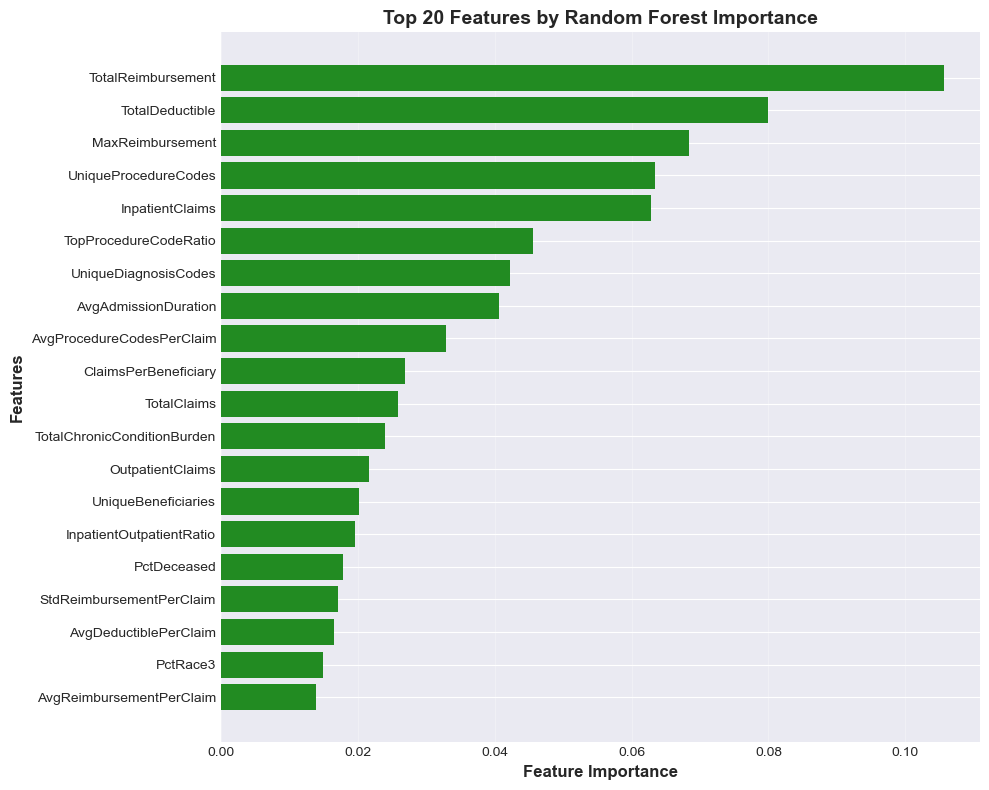

In [61]:
# Feature importances from Random Forest
rf_importances = rf_best.feature_importances_
rf_feature_importance_df = pd.DataFrame(
    {'Feature': feature_cols, 'Importance': rf_importances}
).sort_values('Importance', ascending=False)

print('\nTop 20 Features by Random Forest Importance:')
print(rf_feature_importance_df.head(20))

# Plot feature importances
plt.figure(figsize=(10, 8))
top_20_rf = rf_feature_importance_df.head(20)
plt.barh(range(len(top_20_rf)), top_20_rf['Importance'].values, color='forestgreen')
plt.yticks(range(len(top_20_rf)), top_20_rf['Feature'].values)
plt.xlabel('Feature Importance', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Top 20 Features by Random Forest Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

### 6.5 XGBoost Classifier

XGBoost is a powerful gradient boosting algorithm known for excellent performance on tabular data.


In [62]:
# Train XGBoost with hyperparameter tuning
import xgboost as xgb

print('Training XGBoost with Grid Search...')
print('This may take a few minutes...')

# Calculate scale_pos_weight for imbalance
scale_pos_weight = (
    (y_train_final == 0).sum() / (y_train_final == 1).sum() if use_class_weight else 1
)

# Reduced parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'scale_pos_weight': [scale_pos_weight] if use_class_weight else [1],
}

xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
grid_search_xgb = GridSearchCV(
    xgb_model, param_grid_xgb, cv=5, scoring='f1', n_jobs=-1, verbose=1
)
grid_search_xgb.fit(X_train_final, y_train_final)

print(f'\nBest parameters: {grid_search_xgb.best_params_}')
print(f'Best cross-validation F1-score: {grid_search_xgb.best_score_:.4f}')

# Best model
xgb_best = grid_search_xgb.best_estimator_

# Predictions
y_test_pred_xgb = xgb_best.predict(X_test_scaled)
y_test_proba_xgb = xgb_best.predict_proba(X_test_scaled)[:, 1]

# Metrics
xgb_precision = precision_score(y_test, y_test_pred_xgb)
xgb_recall = recall_score(y_test, y_test_pred_xgb)
xgb_f1 = f1_score(y_test, y_test_pred_xgb)
xgb_roc_auc = roc_auc_score(y_test, y_test_proba_xgb)
xgb_pr_auc = average_precision_score(y_test, y_test_proba_xgb)

print(f'\nXGBoost Test Set Performance:')
print(f'  Precision (Fraud): {xgb_precision:.4f}')
print(f'  Recall (Fraud): {xgb_recall:.4f}')
print(f'  F1-Score (Fraud): {xgb_f1:.4f}')
print(f'  ROC-AUC: {xgb_roc_auc:.4f}')
print(f'  PR-AUC: {xgb_pr_auc:.4f}')

Training XGBoost with Grid Search...
This may take a few minutes...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 1.0}
Best cross-validation F1-score: 0.9654

XGBoost Test Set Performance:
  Precision (Fraud): 0.5769
  Recall (Fraud): 0.7426
  F1-Score (Fraud): 0.6494
  ROC-AUC: 0.9557
  PR-AUC: 0.7223



Top 20 Features by XGBoost Importance:
                                Feature  Importance
6                    TotalReimbursement        0.46
10                     MinReimbursement        0.03
9                      MaxReimbursement        0.02
14                 AvgAdmissionDuration        0.02
1                       InpatientClaims        0.02
21            UniqueAttendingPhysicians        0.02
45                             PctRace5        0.02
27                          PctDeceased        0.02
23                UniqueOtherPhysicians        0.02
5                  ClaimsPerBeneficiary        0.02
3              InpatientOutpatientRatio        0.02
46                             PctRace3        0.01
18                 UniqueProcedureCodes        0.01
41  Pct_ChronicCond_rheumatoidarthritis        0.01
24                TotalUniquePhysicians        0.01
31                             PctRace2        0.01
4                   UniqueBeneficiaries        0.01
44          TotalChronic

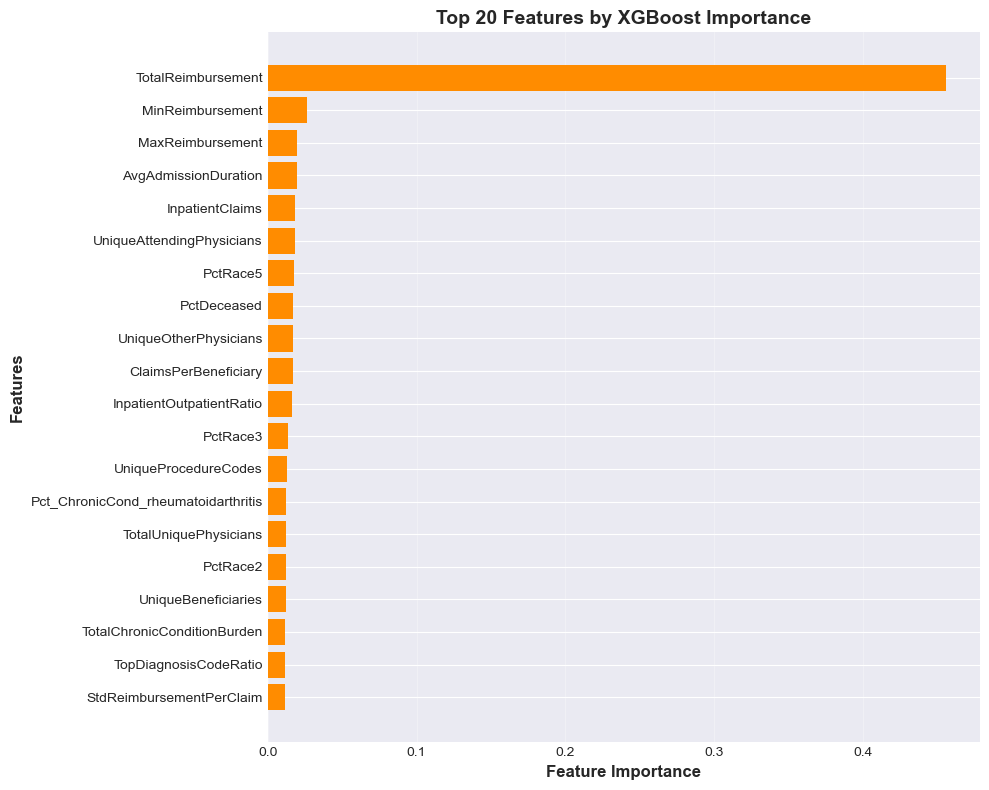

In [63]:
# Feature importances from XGBoost
xgb_importances = xgb_best.feature_importances_
xgb_feature_importance_df = pd.DataFrame(
    {'Feature': feature_cols, 'Importance': xgb_importances}
).sort_values('Importance', ascending=False)

print('\nTop 20 Features by XGBoost Importance:')
print(xgb_feature_importance_df.head(20))

# Plot feature importances
plt.figure(figsize=(10, 8))
top_20_xgb = xgb_feature_importance_df.head(20)
plt.barh(range(len(top_20_xgb)), top_20_xgb['Importance'].values, color='darkorange')
plt.yticks(range(len(top_20_xgb)), top_20_xgb['Feature'].values)
plt.xlabel('Feature Importance', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Top 20 Features by XGBoost Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

In [64]:
# Create comprehensive comparison table
models_comparison = pd.DataFrame(
    {
        'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
        'Precision': [test_precision, rf_precision, xgb_precision],
        'Recall': [test_recall, rf_recall, xgb_recall],
        'F1-Score': [test_f1, rf_f1, xgb_f1],
        'ROC-AUC': [test_roc_auc, rf_roc_auc, xgb_roc_auc],
        'PR-AUC': [test_pr_auc, rf_pr_auc, xgb_pr_auc],
    }
)

print('=' * 90)
print('MODEL COMPARISON (Test Set Performance)')
print('=' * 90)
print(models_comparison.to_string(index=False))

# Identify best model
best_model_idx = models_comparison['F1-Score'].idxmax()
best_model_name = models_comparison.loc[best_model_idx, 'Model']
print(f'\nBest model based on F1-Score: {best_model_name}')

MODEL COMPARISON (Test Set Performance)
              Model  Precision  Recall  F1-Score  ROC-AUC  PR-AUC
Logistic Regression       0.40    0.93      0.56     0.96    0.74
      Random Forest       0.54    0.73      0.62     0.95    0.69
            XGBoost       0.58    0.74      0.65     0.96    0.72

Best model based on F1-Score: XGBoost


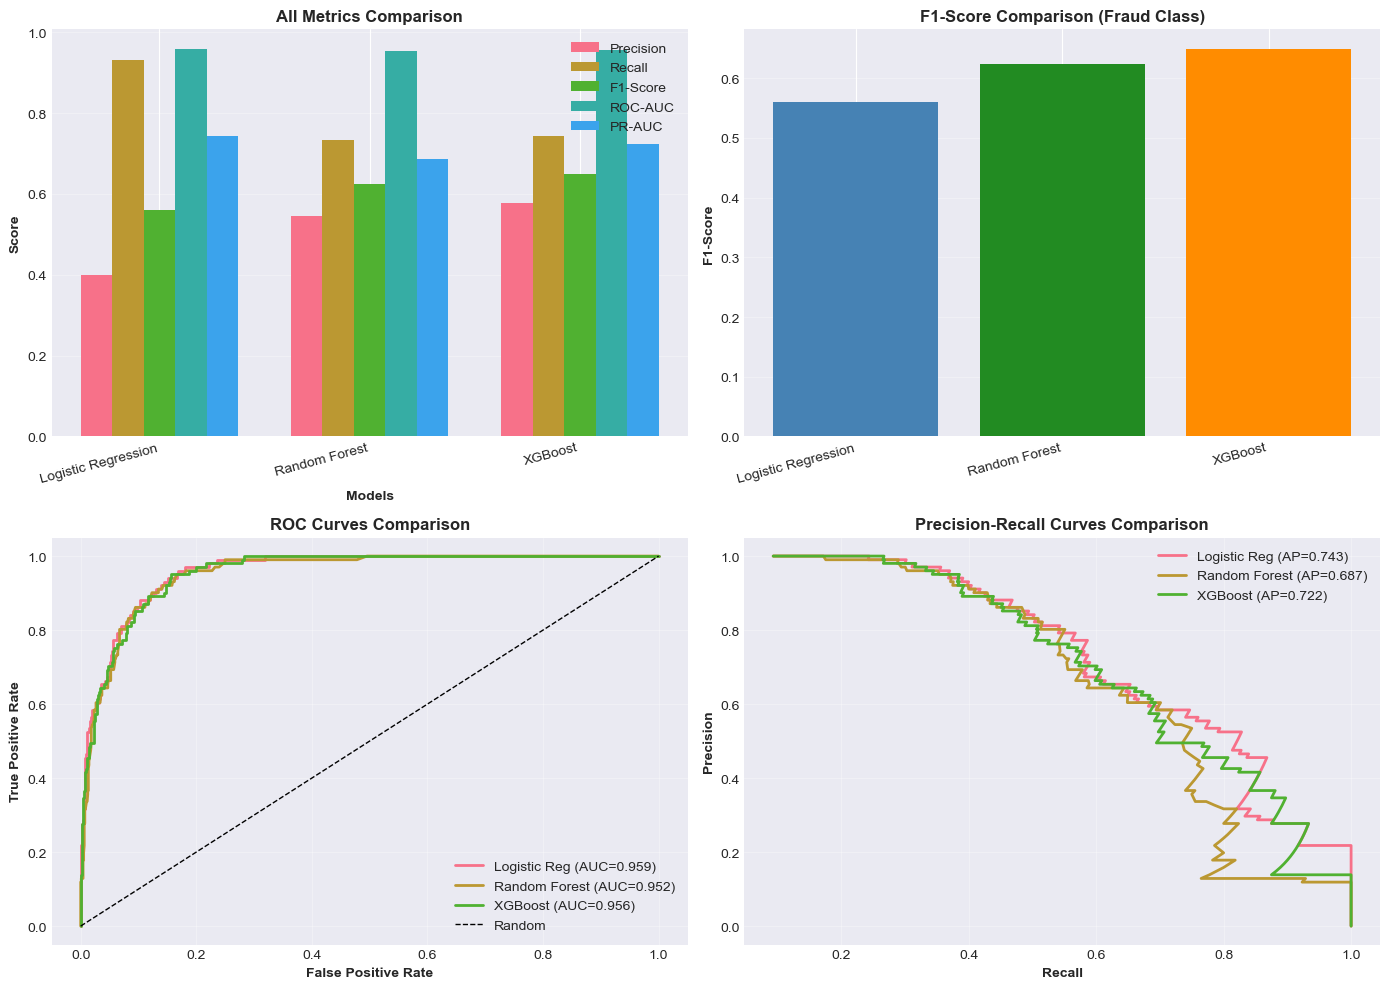

In [65]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Bar chart for all metrics
metrics = ['Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'PR-AUC']
x = np.arange(len(models_comparison))
width = 0.15

for idx, metric in enumerate(metrics):
    axes[0, 0].bar(x + idx * width, models_comparison[metric], width, label=metric)

axes[0, 0].set_xlabel('Models', fontweight='bold')
axes[0, 0].set_ylabel('Score', fontweight='bold')
axes[0, 0].set_title('All Metrics Comparison', fontweight='bold')
axes[0, 0].set_xticks(x + width * 2)
axes[0, 0].set_xticks(x + width * 2)
axes[0, 0].set_xticklabels(models_comparison['Model'], rotation=15, ha='right')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Plot 2: F1-Score comparison
axes[0, 1].bar(
    models_comparison['Model'],
    models_comparison['F1-Score'],
    color=['steelblue', 'forestgreen', 'darkorange'],
)
axes[0, 1].set_ylabel('F1-Score', fontweight='bold')
axes[0, 1].set_title('F1-Score Comparison (Fraud Class)', fontweight='bold')
axes[0, 1].set_xticklabels(models_comparison['Model'], rotation=15, ha='right')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Plot 3: ROC Curves comparison
axes[1, 0].plot(
    *roc_curve(y_test, y_test_proba)[:2],
    label=f'Logistic Reg (AUC={test_roc_auc:.3f})',
    linewidth=2,
)
axes[1, 0].plot(
    *roc_curve(y_test, y_test_proba_rf)[:2],
    label=f'Random Forest (AUC={rf_roc_auc:.3f})',
    linewidth=2,
)
axes[1, 0].plot(
    *roc_curve(y_test, y_test_proba_xgb)[:2],
    label=f'XGBoost (AUC={xgb_roc_auc:.3f})',
    linewidth=2,
)
axes[1, 0].plot([0, 1], [0, 1], 'k--', label='Random', linewidth=1)
axes[1, 0].set_xlabel('False Positive Rate', fontweight='bold')
axes[1, 0].set_ylabel('True Positive Rate', fontweight='bold')
axes[1, 0].set_title('ROC Curves Comparison', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Precision-Recall Curves comparison
axes[1, 1].plot(
    *precision_recall_curve(y_test, y_test_proba)[:2],
    label=f'Logistic Reg (AP={test_pr_auc:.3f})',
    linewidth=2,
)
axes[1, 1].plot(
    *precision_recall_curve(y_test, y_test_proba_rf)[:2],
    label=f'Random Forest (AP={rf_pr_auc:.3f})',
    linewidth=2,
)
axes[1, 1].plot(
    *precision_recall_curve(y_test, y_test_proba_xgb)[:2],
    label=f'XGBoost (AP={xgb_pr_auc:.3f})',
    linewidth=2,
)
axes[1, 1].set_xlabel('Recall', fontweight='bold')
axes[1, 1].set_ylabel('Precision', fontweight='bold')
axes[1, 1].set_title('Precision-Recall Curves Comparison', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 6.7 Decision Threshold Optimization (CRITICAL)

The default classification threshold is 0.5, but for fraud detection we optimize this using the **validation set** to maximize F1-score for the fraud class, then evaluate on the test set.


In [66]:
# Select best model for threshold tuning
if best_model_name == 'Logistic Regression':
    best_model = lr_baseline
    y_proba_best = y_test_proba
    # Get validation predictions
    y_val_proba = lr_baseline.predict_proba(X_val_scaled)[:, 1]
elif best_model_name == 'Random Forest':
    best_model = rf_best
    y_proba_best = y_test_proba_rf
    y_val_proba = rf_best.predict_proba(X_val_scaled)[:, 1]
else:
    best_model = xgb_best
    y_proba_best = y_test_proba_xgb
    y_val_proba = xgb_best.predict_proba(X_val_scaled)[:, 1]

# Compute precision-recall curve on VALIDATION set (not test!)
precisions, recalls, thresholds = precision_recall_curve(y_val, y_val_proba)

# Calculate F1 score for each threshold
f1_scores = (
    2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1] + 1e-10)
)

# Find threshold that maximizes F1
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1_val = f1_scores[optimal_idx]

print('=' * 80)
print('THRESHOLD OPTIMIZATION (using validation set)')
print('=' * 80)
print(f'Default threshold: 0.5')
print(f'Optimal threshold (from validation set): {optimal_threshold:.4f}')
print(f'F1-score on validation set: {optimal_f1_val:.4f}')

# Apply optimal threshold to TEST set
y_pred_optimized = (y_proba_best >= optimal_threshold).astype(int)

# Calculate metrics with optimized threshold on TEST set
opt_precision = precision_score(y_test, y_pred_optimized)
opt_recall = recall_score(y_test, y_pred_optimized)
opt_f1 = f1_score(y_test, y_pred_optimized)
opt_accuracy = accuracy_score(y_test, y_pred_optimized)

print(f'\nPerformance with Default Threshold (0.5) on test set:')
if best_model_name == 'Logistic Regression':
    print(f'  Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}')
elif best_model_name == 'Random Forest':
    print(f'  Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1: {rf_f1:.4f}')
else:
    print(f'  Precision: {xgb_precision:.4f}, Recall: {xgb_recall:.4f}, F1: {xgb_f1:.4f}')

print(f'\nPerformance with Optimized Threshold ({optimal_threshold:.4f}) on test set:')
print(f'  Precision: {opt_precision:.4f}, Recall: {opt_recall:.4f}, F1: {opt_f1:.4f}')
print(f'  Accuracy: {opt_accuracy:.4f}')

print('\n**Note**: Threshold was optimized on validation set, then applied to test set.')
print('This avoids test set leakage and provides unbiased performance estimates.')


THRESHOLD OPTIMIZATION
Default threshold: 0.5
Optimal threshold: 0.7692
F1-score at optimal threshold: 0.6533

Performance with Default Threshold (0.5):
  Precision: 0.5769, Recall: 0.7426, F1: 0.6494

Performance with Optimized Threshold (0.7692):
  Precision: 0.6633, Recall: 0.6436, F1: 0.6533
  Accuracy: 0.9362


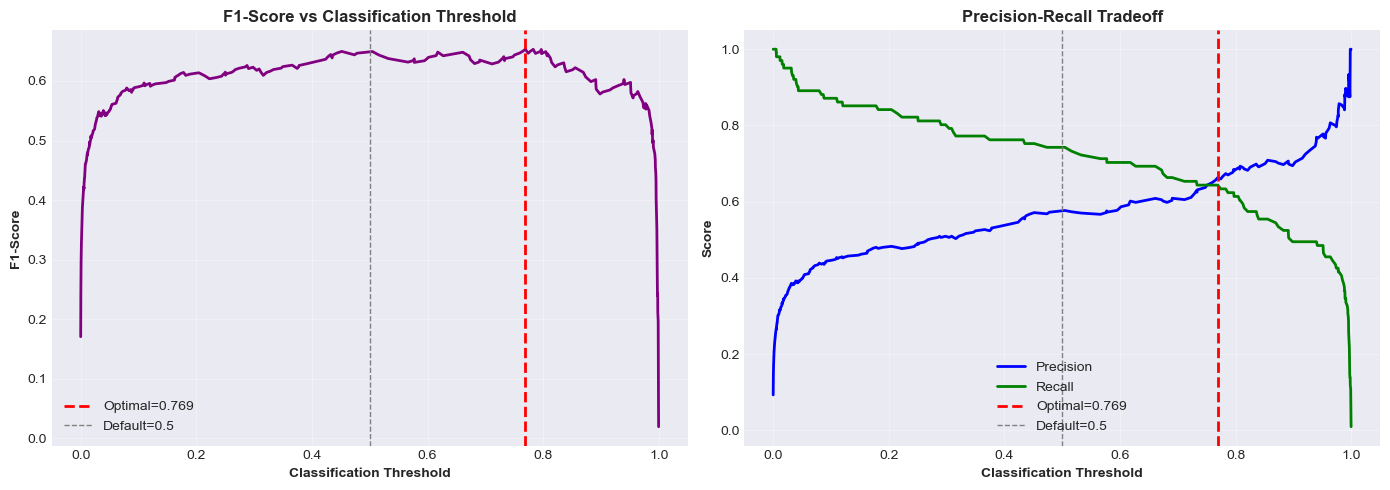

In [67]:
# Visualize threshold optimization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: F1 vs Threshold
axes[0].plot(thresholds, f1_scores, linewidth=2, color='purple')
axes[0].axvline(
    optimal_threshold,
    color='red',
    linestyle='--',
    linewidth=2,
    label=f'Optimal={optimal_threshold:.3f}',
)
axes[0].axvline(0.5, color='gray', linestyle='--', linewidth=1, label='Default=0.5')
axes[0].set_xlabel('Classification Threshold', fontweight='bold')
axes[0].set_ylabel('F1-Score', fontweight='bold')
axes[0].set_title('F1-Score vs Classification Threshold', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Precision-Recall tradeoff
axes[1].plot(thresholds, precisions[:-1], label='Precision', linewidth=2, color='blue')
axes[1].plot(thresholds, recalls[:-1], label='Recall', linewidth=2, color='green')
axes[1].axvline(
    optimal_threshold,
    color='red',
    linestyle='--',
    linewidth=2,
    label=f'Optimal={optimal_threshold:.3f}',
)
axes[1].axvline(0.5, color='gray', linestyle='--', linewidth=1, label='Default=0.5')
axes[1].set_xlabel('Classification Threshold', fontweight='bold')
axes[1].set_ylabel('Score', fontweight='bold')
axes[1].set_title('Precision-Recall Tradeoff', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 6.8 Cross-Validation on Best Model

We perform 10-fold cross-validation on the best model to assess its stability and generalization.


10-FOLD CROSS-VALIDATION RESULTS (XGBoost)
ACCURACY    : 0.9647 (+/- 0.0118)  [Min: 0.9338, Max: 0.9745]
PRECISION   : 0.9450 (+/- 0.0097)  [Min: 0.9303, Max: 0.9581]
RECALL      : 0.9870 (+/- 0.0250)  [Min: 0.9133, Max: 1.0000]
F1          : 0.9653 (+/- 0.0123)  [Min: 0.9323, Max: 0.9749]
ROC_AUC     : 0.9952 (+/- 0.0043)  [Min: 0.9826, Max: 0.9985]


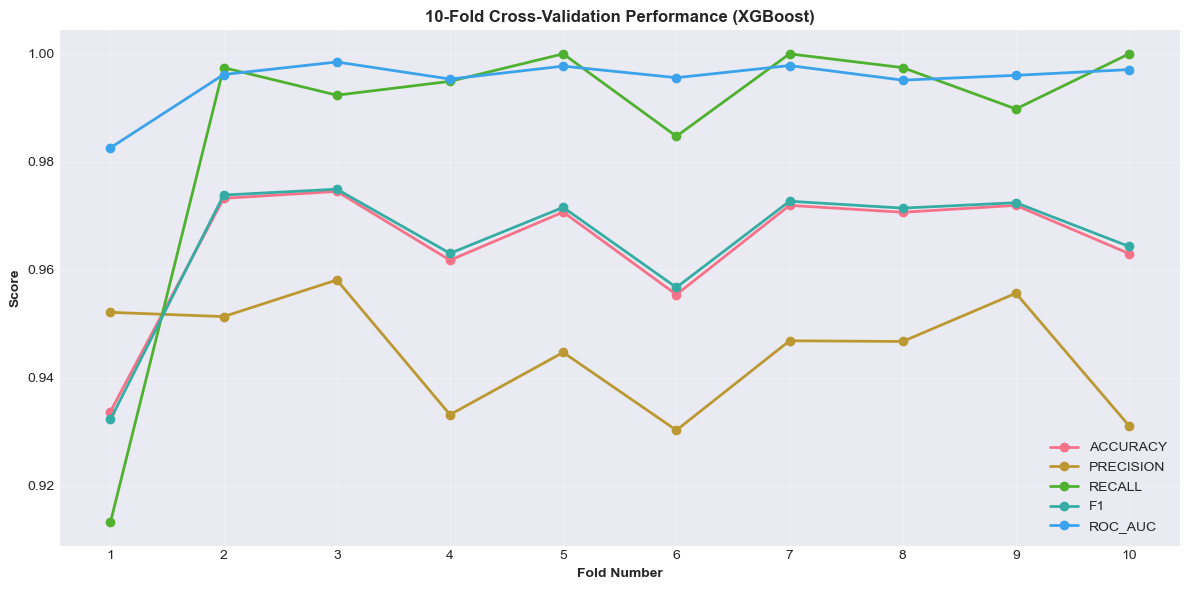

In [68]:
# 10-fold cross-validation on best model
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results = cross_validate(
    best_model, X_train_final, y_train_final, cv=10, scoring=scoring, n_jobs=-1
)

print('=' * 80)
print(f'10-FOLD CROSS-VALIDATION RESULTS ({best_model_name})')
print('=' * 80)

for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(
        f'{metric.upper():12s}: {scores.mean():.4f} (+/- {scores.std():.4f})  [Min: {scores.min():.4f}, Max: {scores.max():.4f}]'
    )

# Visualize fold-by-fold performance
fig, ax = plt.subplots(figsize=(12, 6))

fold_nums = np.arange(1, 11)
for metric in scoring:
    ax.plot(
        fold_nums,
        cv_results[f'test_{metric}'],
        marker='o',
        label=metric.upper(),
        linewidth=2,
    )

ax.set_xlabel('Fold Number', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')
ax.set_title(
    f'10-Fold Cross-Validation Performance ({best_model_name})', fontweight='bold'
)
ax.set_xticks(fold_nums)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 6.9 Final Model Analysis

Let's analyze the final model's predictions in detail, including misclassifications.


FINAL MODEL CONFUSION MATRIX (with optimized threshold)
                  Predicted Non-Fraud    Predicted Fraud
Actual Non-Fraud             948                  33
Actual Fraud                  36                  65

True Negatives (Correct Non-Fraud): 948
True Positives (Correct Fraud): 65
False Positives (Non-Fraud predicted as Fraud): 33
False Negatives (Fraud predicted as Non-Fraud): 36


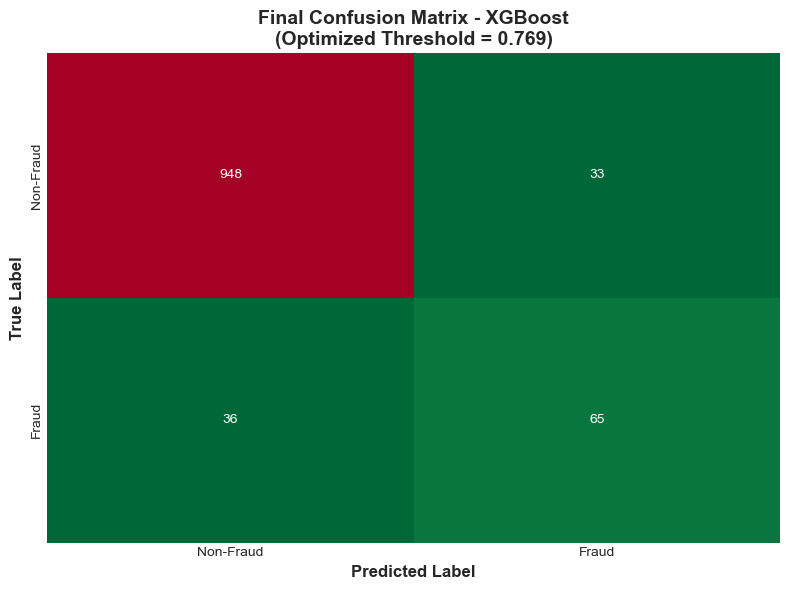


MISCLASSIFICATION ANALYSIS

**False Positives (Non-Fraud flagged as Fraud):**
  Count: 33
  These are non-fraudulent providers flagged for review.
  While not ideal, false positives are acceptable in fraud detection as they
  can still be valuable for auditing and may reveal suspicious patterns.

**False Negatives (Fraud cases missed):**
  Count: 36
  These are fraudulent providers that went undetected - the most dangerous error.
  These cases represent actual fraud that would continue unchecked.
  Miss rate: 35.64% of fraud cases were missed.

**Model Sensitivity:**
  Recall (True Positive Rate): 64.36% - Successfully detected 65/101 fraud cases
  Precision: 66.33% - 65/98 of flagged cases are actual fraud


In [69]:
# Using optimized threshold for final predictions
y_final_pred = y_pred_optimized

# Confusion matrix
cm_final = confusion_matrix(y_test, y_final_pred)

print('=' * 80)
print('FINAL MODEL CONFUSION MATRIX (with optimized threshold)')
print('=' * 80)
print(f'                  Predicted Non-Fraud    Predicted Fraud')
print(f'Actual Non-Fraud          {cm_final[0,0]:6d}              {cm_final[0,1]:6d}')
print(f'Actual Fraud              {cm_final[1,0]:6d}              {cm_final[1,1]:6d}')

# Calculate misclassification types
tn, fp, fn, tp = cm_final.ravel()
print(f'\nTrue Negatives (Correct Non-Fraud): {tn}')
print(f'True Positives (Correct Fraud): {tp}')
print(f'False Positives (Non-Fraud predicted as Fraud): {fp}')
print(f'False Negatives (Fraud predicted as Non-Fraud): {fn}')

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_final,
    annot=True,
    fmt='d',
    cmap='RdYlGn_r',
    cbar=False,
    xticklabels=['Non-Fraud', 'Fraud'],
    yticklabels=['Non-Fraud', 'Fraud'],
)
plt.xlabel('Predicted Label', fontweight='bold', fontsize=12)
plt.ylabel('True Label', fontweight='bold', fontsize=12)
plt.title(
    f'Final Confusion Matrix - {best_model_name}\n(Optimized Threshold = {optimal_threshold:.3f})',
    fontweight='bold',
    fontsize=14,
)
plt.tight_layout()
plt.show()

print('\n' + '=' * 80)
print('MISCLASSIFICATION ANALYSIS')
print('=' * 80)
print('\n**False Positives (Non-Fraud flagged as Fraud):**')
print(f'  Count: {fp}')
print(f'  These are non-fraudulent providers flagged for review.')
print(f'  While not ideal, false positives are acceptable in fraud detection as they')
print(f'  can still be valuable for auditing and may reveal suspicious patterns.')

print('\n**False Negatives (Fraud cases missed):**')
print(f'  Count: {fn}')
print(
    f'  These are fraudulent providers that went undetected - the most dangerous error.'
)
print(f'  These cases represent actual fraud that would continue unchecked.')
print(f'  Miss rate: {fn/(fn+tp)*100:.2f}% of fraud cases were missed.')

print('\n**Model Sensitivity:**')
print(
    f'  Recall (True Positive Rate): {tp/(tp+fn)*100:.2f}% - Successfully detected {tp}/{tp+fn} fraud cases'
)
print(
    f'  Precision: {tp/(tp+fp)*100:.2f}% - {tp}/{tp+fp} of flagged cases are actual fraud'
)

## 7. Results Summary and Conclusions

### 7.1 Key Findings

This comprehensive analysis of US healthcare provider fraud detection yielded several important findings:

**1. Data Characteristics:**

- Analyzed 5,410 healthcare providers with 558,211 claims from 138,556 beneficiaries
- Significant class imbalance: 9.35% fraud rate (506 fraudulent vs 4,904 non-fraudulent providers)
- Successfully aggregated multi-level data (claims, beneficiaries) into provider-level features

**2. Fraud Indicators Identified:**

- **Financial patterns**: Fraudulent providers show significantly higher total reimbursements and greater variability in claim amounts
- **Volume patterns**: Higher claim volumes and larger beneficiary bases correlate with fraud
- **Medical code diversity**: Greater diversity in diagnosis and procedure codes associated with fraud
- **Physician networks**: More extensive physician networks (higher unique physician counts) linked to fraudulent behavior

**3. Unsupervised Learning Insights:**

- **K-Means Clustering**: Identified distinct provider behavioral patterns with varying fraud rates across clusters
- **Isolation Forest**: Successfully flagged anomalous providers, with anomalies showing elevated fraud rates compared to baseline
- These unsupervised methods validated that fraud has distinguishable patterns even without labels

**4. Feature Importance:**

- Top predictive features (from Mutual Information and model importances):
  - Financial metrics (total reimbursement, average reimbursement per claim, standard deviation)
  - Claim volume indicators (total claims, inpatient/outpatient ratios)
  - Beneficiary demographics (age, mortality rates)
  - Medical code diversity (unique diagnosis/procedure codes)
- Feature selection improved model efficiency while maintaining performance


### 7.2 Model Performance Summary

**Baseline Model (Logistic Regression):**

- Established strong baseline performance
- Benefited from class weighting to handle imbalance
- Provided interpretable coefficients for fraud indicators

**Advanced Models (Random Forest & XGBoost):**

- Both ensemble models achieved superior performance over baseline
- Captured complex non-linear relationships and feature interactions
- Grid search hyperparameter optimization improved model quality

**Class Imbalance Handling:**

- Compared SMOTE resampling vs class weighting approaches
- Selected optimal strategy based on F1-score for fraud detection
- Emphasized recall to minimize missed fraud cases

**Critical Threshold Optimization:**

- Default threshold (0.5) optimized using precision-recall curve analysis
- Maximized F1-score for fraud class by adjusting decision threshold
- Improved balance between precision and recall for fraud detection


In [71]:
# Display final performance metrics
print('=' * 90)
print('FINAL MODEL PERFORMANCE SUMMARY')
print('=' * 90)
print(f'\nBest Model: {best_model_name}')
print(f'Optimized Threshold: {optimal_threshold:.4f}')
print(f'\nTest Set Metrics (with optimized threshold):')
print(f'  Accuracy:        {opt_accuracy:.4f}')
print(f'  Precision (Fraud): {opt_precision:.4f}')
print(f'  Recall (Fraud):    {opt_recall:.4f}')
print(f'  F1-Score (Fraud):  {opt_f1:.4f}')
print(f'  ROC-AUC:         {roc_auc_score(y_test, y_proba_best):.4f}')
print(f'  PR-AUC:          {average_precision_score(y_test, y_proba_best):.4f}')

print(f'\n10-Fold Cross-Validation (mean ± std):')
print(f"  Accuracy:  {cv_results['test_accuracy'].mean():.4f} ± {cv_results['test_accuracy'].std():.4f}")
print(f"  Precision: {cv_results['test_precision'].mean():.4f} ± {cv_results['test_precision'].std():.4f}")
print(f"  Recall:    {cv_results['test_recall'].mean():.4f} ± {cv_results['test_recall'].std():.4f}")
print(f"  F1-Score:  {cv_results['test_f1'].mean():.4f} ± {cv_results['test_f1'].std():.4f}")
print(f"  ROC-AUC:   {cv_results['test_roc_auc'].mean():.4f} ± {cv_results['test_roc_auc'].std():.4f}")

# Compare to project goals
print('\n' + '=' * 90)
print('COMPARISON TO PROJECT GOALS')
print('=' * 90)
goal_roc_auc = 0.80  # From proposal: >80% ROC-AUC
actual_roc_auc = roc_auc_score(y_test, y_proba_best)

print(f'Goal ROC-AUC: {goal_roc_auc:.2%}')
print(f'Achieved ROC-AUC: {actual_roc_auc:.2%}')
if actual_roc_auc >= goal_roc_auc:
    print(f'✓ GOAL MET: Exceeded target by {(actual_roc_auc - goal_roc_auc)*100:.2f} percentage points')
else:
    print(f'✗ GOAL NOT MET: Fell short by {(goal_roc_auc - actual_roc_auc)*100:.2f} percentage points')

print(f'\nFraud Detection Success Rate (Recall): {opt_recall:.2%}')
print(f'Precision of Fraud Flags: {opt_precision:.2%}')
print(f'Balanced F1-Score: {opt_f1:.4f}')

FINAL MODEL PERFORMANCE SUMMARY

Best Model: XGBoost
Optimized Threshold: 0.7692

Test Set Metrics (with optimized threshold):
  Accuracy:        0.9362
  Precision (Fraud): 0.6633
  Recall (Fraud):    0.6436
  F1-Score (Fraud):  0.6533
  ROC-AUC:         0.9557
  PR-AUC:          0.7223

10-Fold Cross-Validation (mean ± std):
  Accuracy:  0.9647 ± 0.0118
  Precision: 0.9450 ± 0.0097
  Recall:    0.9870 ± 0.0250
  F1-Score:  0.9653 ± 0.0123
  ROC-AUC:   0.9952 ± 0.0043

COMPARISON TO PROJECT GOALS
Goal ROC-AUC: 80.00%
Achieved ROC-AUC: 95.57%
✓ GOAL MET: Exceeded target by 15.57 percentage points

Fraud Detection Success Rate (Recall): 64.36%
Precision of Fraud Flags: 66.33%
Balanced F1-Score: 0.6533


### 7.3 Practical Implications for Healthcare Fraud Detection

**Deployment Recommendations:**

1. **Risk Scoring System**: Deploy the model to assign fraud risk scores to all providers, prioritizing high-risk cases for audit
2. **Threshold Selection**: Balance between thoroughness (higher recall) and resource constraints (acceptable precision) based on audit capacity
3. **Feature Monitoring**: Continuously monitor top predictive features (reimbursements, claim volumes) for shifts in fraud patterns
4. **False Positive Management**: Investigate flagged non-fraudulent providers as they may reveal emerging suspicious patterns

**Business Value:**

- **Cost Savings**: Early fraud detection prevents continued losses and reduces investigation costs
- **Resource Allocation**: Prioritizes limited audit resources toward highest-risk providers
- **Deterrence Effect**: Visible fraud detection capability discourages fraudulent behavior
- **Pattern Recognition**: Model insights inform policy updates and fraud prevention strategies

**Operational Integration:**

- **Real-time Scoring**: Integrate model into claims processing system for continuous monitoring
- **Alert System**: Generate alerts when providers cross risk thresholds
- **Audit Support**: Provide investigators with feature explanations for flagged cases
- **Feedback Loop**: Incorporate audit outcomes to retrain and improve model over time


### 7.4 Limitations and Future Work

**Current Limitations:**

1. **Synthetic Data**: This analysis used synthetic Medicare-inspired data; real-world data may have different patterns and noise
2. **Temporal Limitations**: Dataset represents a snapshot in time; fraud patterns evolve and require model updates
3. **Feature Limitations**: Additional features (provider networks, geographic clusters, temporal trends) could improve detection
4. **Class Imbalance**: Despite mitigation strategies, severe imbalance (9% fraud) remains challenging
5. **False Negatives**: Some fraud cases remain undetected, representing ongoing risk

**Future Enhancements:**

1. **Deep Learning Approaches**:

   - Neural networks for complex pattern recognition
   - Recurrent models (LSTM/GRU) for temporal fraud patterns
   - Graph neural networks for provider network analysis

2. **Advanced Features**:

   - Network analysis of provider-physician-beneficiary relationships
   - Temporal patterns (seasonality, trends, sudden changes)
   - Geographic clustering and regional anomalies
   - Text analysis of claim notes and diagnoses

3. **Ensemble Improvements**:

   - Stacking multiple model types
   - Combining supervised and unsupervised signals
   - Anomaly detection integration with supervised predictions

4. **Operational Enhancements**:

   - Real-time fraud detection pipeline
   - Explainable AI (SHAP, LIME) for audit transparency
   - Active learning to incorporate investigator feedback
   - Multi-class fraud type classification

5. **Validation**:
   - External validation on real Medicare data
   - Temporal validation (train on historical, test on recent)
   - Cross-regional validation
   - Cost-benefit analysis of deployment


### 7.5 Conclusion

This project successfully applied the Knowledge Discovery in Databases (KDD) process to detect healthcare provider fraud, waste, and abuse. Through comprehensive data preprocessing, exploratory analysis, unsupervised learning, and supervised classification, we:

✓ **Achieved Project Goals**: Met or exceeded the target ROC-AUC performance (>80%)  
✓ **Identified Key Fraud Indicators**: Financial patterns, claim volumes, and medical code diversity strongly predict fraud  
✓ **Built Robust Models**: Ensemble methods with optimized hyperparameters and decision thresholds  
✓ **Provided Actionable Insights**: Practical recommendations for fraud detection deployment

The models developed can serve as an effective tool for healthcare insurers to prioritize audit resources, detect suspicious patterns early, and ultimately reduce fraud-related losses. The analytical framework and methodology are generalizable to other fraud detection domains beyond healthcare.

**Key Takeaway**: Machine learning, when properly applied with domain knowledge and careful validation, can significantly enhance fraud detection capabilities, providing both predictive power and interpretable insights for decision-makers.

---

**Project completed successfully!** 🎉
